In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
from sklearn.preprocessing import LabelEncoder

In [1134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

### Reading the 5 year Data

In [10]:
df = pd.read_csv("Kmart_ML.csv", index_col = False)

In [11]:
df

,Order ID,Product,Price,City,State,Day,Month,Time,Date,Date_Time,Year,Product_Type,Synthetic_Quantity
0,176558,USB-C Charging Cable,11.95,Dallas,TX,19,4,8.8,2019-04-19,2019-04-19 08:46:00,2019,Accessories,2.0
1,176559,Bose SoundSport Headphones,99.99,Boston,MA,7,4,22.5,2019-04-07,2019-04-07 22:30:00,2019,Airpods_Bose,1.0
2,176560,Google Phone,600.00,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019,Phones,1.0
3,176560,Wired Headphones,11.99,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019,Accessories,1.0
4,176561,Wired Headphones,11.99,Los Angeles,CA,30,4,9.4,2019-04-30,2019-04-30 09:27:00,2019,Accessories,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928255,259353,AAA Batteries (4-pack),2.99,Los Angeles,CA,17,9,20.9,2023-09-17,2019-09-17 20:56:00,2023,Accessories,3.0
928256,259354,iPhone,700.00,San Francisco,CA,1,9,16.0,2023-09-01,2019-09-01 16:00:00,2023,Phones,1.0
928257,259355,iPhone,700.00,San Francisco,CA,23,9,7.6,2023-09-23,2019-09-23 07:39:00,2023,Phones,1.0
928258,259356,34in Ultrawide Monitor,379.99,San Francisco,CA,19,9,17.5,2023-09-19,2019-09-19 17:30:00,2023,Remote-Work Device,1.0


In [12]:
new_order = ['Order ID', 'Product', 'Product_Type', 'Synthetic_Quantity', 'Price', 'City', 'State', 'Day', 'Month', 'Time', 'Date', 'Date_Time', 'Year']

# Reassign the DataFrame with the new order
df = df[new_order]

In [13]:
df

,Order ID,Product,Product_Type,Synthetic_Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year
0,176558,USB-C Charging Cable,Accessories,2.0,11.95,Dallas,TX,19,4,8.8,2019-04-19,2019-04-19 08:46:00,2019
1,176559,Bose SoundSport Headphones,Airpods_Bose,1.0,99.99,Boston,MA,7,4,22.5,2019-04-07,2019-04-07 22:30:00,2019
2,176560,Google Phone,Phones,1.0,600.00,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
3,176560,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
4,176561,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,30,4,9.4,2019-04-30,2019-04-30 09:27:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928255,259353,AAA Batteries (4-pack),Accessories,3.0,2.99,Los Angeles,CA,17,9,20.9,2023-09-17,2019-09-17 20:56:00,2023
928256,259354,iPhone,Phones,1.0,700.00,San Francisco,CA,1,9,16.0,2023-09-01,2019-09-01 16:00:00,2023
928257,259355,iPhone,Phones,1.0,700.00,San Francisco,CA,23,9,7.6,2023-09-23,2019-09-23 07:39:00,2023
928258,259356,34in Ultrawide Monitor,Remote-Work Device,1.0,379.99,San Francisco,CA,19,9,17.5,2023-09-19,2019-09-19 17:30:00,2023


In [14]:
col_rename = {
    'Product_Type': 'Type',
    'Synthetic_Quantity': 'Quantity'
}

# Rename the columns
df = df.rename(columns=col_rename)

In [34]:
df.tail(30)

,Order ID,Product,Type,Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year
928230,259329,Lightning Charging Cable,Accessories,3.0,14.95,Atlanta,GA,5,9,19.0,2023-09-05,2019-09-05 19:00:00,2023
928231,259330,AA Batteries (4-pack),Accessories,1.0,3.84,Seattle,WA,25,9,22.0,2023-09-25,2019-09-25 22:01:00,2023
928232,259331,Apple Airpods Headphones,Airpods_Bose,4.0,150.00,New York City,NY,29,9,7.0,2023-09-29,2019-09-29 07:00:00,2023
928233,259332,Apple Airpods Headphones,Airpods_Bose,2.0,150.00,Atlanta,GA,16,9,19.4,2023-09-16,2019-09-16 19:21:00,2023
928234,259333,Bose SoundSport Headphones,Airpods_Bose,3.0,99.99,San Francisco,CA,19,9,18.0,2023-09-19,2019-09-19 18:03:00,2023
928235,259334,USB-C Charging Cable,Accessories,1.0,11.95,Atlanta,GA,27,9,10.9,2023-09-27,2019-09-27 10:52:00,2023
928236,259335,Lightning Charging Cable,Accessories,1.0,14.95,Seattle,WA,26,9,17.4,2023-09-26,2019-09-26 17:21:00,2023
928237,259336,AAA Batteries (4-pack),Accessories,1.0,2.99,Boston,MA,25,9,0.2,2023-09-25,2019-09-25 00:13:00,2023
928238,259337,USB-C Charging Cable,Accessories,1.0,11.95,Boston,MA,19,9,17.6,2023-09-19,2019-09-19 17:34:00,2023
928239,259338,AAA Batteries (4-pack),Accessories,2.0,2.99,Boston,MA,2,9,21.5,2023-09-02,2019-09-02 21:29:00,2023


In [28]:
product_counts = df['Product'].value_counts()

# Display sorted list of products with counts
print(product_counts)

# Optional → See as DataFrame
product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['Product', 'Order Count']
print(product_counts_df)

Product
USB-C Charging Cable          109275
Lightning Charging Cable      108025
AAA Batteries (4-pack)        103045
AA Batteries (4-pack)         102790
Wired Headphones               94240
Apple Airpods Headphones       77605
Bose SoundSport Headphones     66475
27in FHD Monitor               37475
iPhone                         34190
27in 4K Gaming Monitor         31120
34in Ultrawide Monitor         30870
Google Phone                   27605
Flatscreen TV                  23965
Macbook Pro Laptop             23600
ThinkPad Laptop                20620
20in Monitor                   20480
Vareebadd Phone                10320
LG Washing Machine              3330
LG Dryer                        3230
Name: count, dtype: int64
                       Product  Order Count
0         USB-C Charging Cable       109275
1     Lightning Charging Cable       108025
2       AAA Batteries (4-pack)       103045
3        AA Batteries (4-pack)       102790
4             Wired Headphones        94240

In [29]:
top_15_products = [
    'USB-C Charging Cable',
    'Lightning Charging Cable',
    'AAA Batteries (4-pack)',
    'AA Batteries (4-pack)',
    'Wired Headphones',
    'Apple Airpods Headphones',
    'Bose SoundSport Headphones',
    '27in FHD Monitor',
    'iPhone',
    '27in 4K Gaming Monitor',
    '34in Ultrawide Monitor',
    'Google Phone',
    'Flatscreen TV',
    'Macbook Pro Laptop',
    'ThinkPad Laptop'
]

In [30]:
df_top15 = df[df['Product'].isin(top_15_products)].copy()

print(df_top15.shape)

(890900, 13)


In [32]:
df_top15.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', 'ThinkPad Laptop', '34in Ultrawide Monitor'],
      dtype=object)

### Aggregating Daily Sales

In [36]:
df_top15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890900 entries, 0 to 928259
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Order ID   890900 non-null  int64         
 1   Product    890900 non-null  object        
 2   Type       890900 non-null  object        
 3   Quantity   890900 non-null  float64       
 4   Price      890900 non-null  float64       
 5   City       890900 non-null  object        
 6   State      890900 non-null  object        
 7   Day        890900 non-null  int64         
 8   Month      890900 non-null  int64         
 9   Time       890900 non-null  float64       
 10  Date       890900 non-null  datetime64[ns]
 11  Date_Time  890900 non-null  object        
 12  Year       890900 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 95.2+ MB


In [35]:
df_top15['Date'] = pd.to_datetime(df_top15['Date'])

In [37]:
df_top15

,Order ID,Product,Type,Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year
0,176558,USB-C Charging Cable,Accessories,2.0,11.95,Dallas,TX,19,4,8.8,2019-04-19,2019-04-19 08:46:00,2019
1,176559,Bose SoundSport Headphones,Airpods_Bose,1.0,99.99,Boston,MA,7,4,22.5,2019-04-07,2019-04-07 22:30:00,2019
2,176560,Google Phone,Phones,1.0,600.00,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
3,176560,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
4,176561,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,30,4,9.4,2019-04-30,2019-04-30 09:27:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928255,259353,AAA Batteries (4-pack),Accessories,3.0,2.99,Los Angeles,CA,17,9,20.9,2023-09-17,2019-09-17 20:56:00,2023
928256,259354,iPhone,Phones,1.0,700.00,San Francisco,CA,1,9,16.0,2023-09-01,2019-09-01 16:00:00,2023
928257,259355,iPhone,Phones,1.0,700.00,San Francisco,CA,23,9,7.6,2023-09-23,2019-09-23 07:39:00,2023
928258,259356,34in Ultrawide Monitor,Remote-Work Device,1.0,379.99,San Francisco,CA,19,9,17.5,2023-09-19,2019-09-19 17:30:00,2023


First we will tyr keeping it minimal and see by only adding PRoduct and date for our groupby so that our data can be less noisey 

Further we will be trying with adding city and everything

In [44]:
daily_sales = df_top15.groupby(['Date', 'Product']).agg({'Quantity' : 'sum'}).reset_index()
daily_sales

,Date,Product,Quantity
0,2019-01-01,27in 4K Gaming Monitor,7.0
1,2019-01-01,27in FHD Monitor,8.0
2,2019-01-01,34in Ultrawide Monitor,18.0
3,2019-01-01,AA Batteries (4-pack),33.0
4,2019-01-01,AAA Batteries (4-pack),61.0
...,...,...,...
27365,2023-12-31,Macbook Pro Laptop,23.0
27366,2023-12-31,ThinkPad Laptop,33.0
27367,2023-12-31,USB-C Charging Cable,110.0
27368,2023-12-31,Wired Headphones,111.0


###  Complete Daily Grid

Even though your data is aggregated, there’s one big gap:

→ We need a complete date grid for each product.

Right now:

    If a product sold nothing on a day → there’s no row for that day.

    The ML model needs to see zero sales, too!

For example, for “iPhone”:

    There might be no row on 2020-02-29 if zero sold.

    We must create it and fill Quantity = 0.

First check for any zero day sales 

In [128]:
# Let'sremove the leap year date
df_top15 = df_top15[df_top15['Date'] != '2020-02-29']

In [129]:
df_top15[df_top15['Date'] == pd.to_datetime('2020-02-29')]

,Order ID,Product,Type,Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year


In [141]:
df_top15

,Order ID,Product,Type,Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year
0,176558,USB-C Charging Cable,Accessories,2.0,11.95,Dallas,TX,19,4,8.8,2019-04-19,2019-04-19 08:46:00,2019
1,176559,Bose SoundSport Headphones,Airpods_Bose,1.0,99.99,Boston,MA,7,4,22.5,2019-04-07,2019-04-07 22:30:00,2019
2,176560,Google Phone,Phones,1.0,600.00,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
3,176560,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
4,176561,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,30,4,9.4,2019-04-30,2019-04-30 09:27:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928255,259353,AAA Batteries (4-pack),Accessories,3.0,2.99,Los Angeles,CA,17,9,20.9,2023-09-17,2019-09-17 20:56:00,2023
928256,259354,iPhone,Phones,1.0,700.00,San Francisco,CA,1,9,16.0,2023-09-01,2019-09-01 16:00:00,2023
928257,259355,iPhone,Phones,1.0,700.00,San Francisco,CA,23,9,7.6,2023-09-23,2019-09-23 07:39:00,2023
928258,259356,34in Ultrawide Monitor,Remote-Work Device,1.0,379.99,San Francisco,CA,19,9,17.5,2023-09-19,2019-09-19 17:30:00,2023


In [153]:
# Step 1 → All unique dates in your dataset
all_dates = pd.DataFrame({
    'Date': pd.date_range(
        start='2019-01-01',
        end='2023-12-31'
    )
})

all_dates = all_dates[all_dates['Date'] != '2020-02-29']
all_dates

,Date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1821,2023-12-27
1822,2023-12-28
1823,2023-12-29
1824,2023-12-30


In [154]:
# Step 2 → All unique products
all_products = pd.DataFrame({
    'Product': df_top15['Product'].unique()
})
all_products

,Product
0,USB-C Charging Cable
1,Bose SoundSport Headphones
2,Google Phone
3,Wired Headphones
4,Macbook Pro Laptop
5,Lightning Charging Cable
6,27in 4K Gaming Monitor
7,AA Batteries (4-pack)
8,Apple Airpods Headphones
9,AAA Batteries (4-pack)


In [155]:
full_grid = all_dates.merge(all_products, how = 'cross')
full_grid

,Date,Product
0,2019-01-01,USB-C Charging Cable
1,2019-01-01,Bose SoundSport Headphones
2,2019-01-01,Google Phone
3,2019-01-01,Wired Headphones
4,2019-01-01,Macbook Pro Laptop
...,...,...
27370,2023-12-31,iPhone
27371,2023-12-31,Flatscreen TV
27372,2023-12-31,27in FHD Monitor
27373,2023-12-31,ThinkPad Laptop


In [156]:
df_grid_test = df_top15.copy()

In [157]:
df_grid_test

,Order ID,Product,Type,Quantity,Price,City,State,Day,Month,Time,Date,Date_Time,Year
0,176558,USB-C Charging Cable,Accessories,2.0,11.95,Dallas,TX,19,4,8.8,2019-04-19,2019-04-19 08:46:00,2019
1,176559,Bose SoundSport Headphones,Airpods_Bose,1.0,99.99,Boston,MA,7,4,22.5,2019-04-07,2019-04-07 22:30:00,2019
2,176560,Google Phone,Phones,1.0,600.00,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
3,176560,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,12,4,14.6,2019-04-12,2019-04-12 14:38:00,2019
4,176561,Wired Headphones,Accessories,1.0,11.99,Los Angeles,CA,30,4,9.4,2019-04-30,2019-04-30 09:27:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928255,259353,AAA Batteries (4-pack),Accessories,3.0,2.99,Los Angeles,CA,17,9,20.9,2023-09-17,2019-09-17 20:56:00,2023
928256,259354,iPhone,Phones,1.0,700.00,San Francisco,CA,1,9,16.0,2023-09-01,2019-09-01 16:00:00,2023
928257,259355,iPhone,Phones,1.0,700.00,San Francisco,CA,23,9,7.6,2023-09-23,2019-09-23 07:39:00,2023
928258,259356,34in Ultrawide Monitor,Remote-Work Device,1.0,379.99,San Francisco,CA,19,9,17.5,2023-09-19,2019-09-19 17:30:00,2023


In [158]:
print(df_grid_test[df_grid_test['Date'] == '2020-02-29'])  # Should return empty

Empty DataFrame
Columns: [Order ID, Product, Type, Quantity, Price, City, State, Day, Month, Time, Date, Date_Time, Year]
Index: []


In [159]:
merged = full_grid.merge(df_grid_test, on = ['Date', 'Product'], how = 'left', indicator = True)
merged

,Date,Product,Order ID,Type,Quantity,Price,City,State,Day,Month,Time,Date_Time,Year,_merge
0,2019-01-01,USB-C Charging Cable,141329.0,Accessories,1.0,11.95,Portland,ME,1.0,1.0,16.0,2019-01-01 16:01:00,2019.0,both
1,2019-01-01,USB-C Charging Cable,141789.0,Accessories,2.0,11.95,Seattle,WA,1.0,1.0,20.2,2019-01-01 20:13:00,2019.0,both
2,2019-01-01,USB-C Charging Cable,141877.0,Accessories,1.0,11.95,San Francisco,CA,1.0,1.0,15.8,2019-01-01 15:49:00,2019.0,both
3,2019-01-01,USB-C Charging Cable,142303.0,Accessories,1.0,11.95,Portland,OR,1.0,1.0,16.4,2019-01-01 16:23:00,2019.0,both
4,2019-01-01,USB-C Charging Cable,142321.0,Accessories,1.0,11.95,Austin,TX,1.0,1.0,23.1,2019-01-01 23:08:00,2019.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890900,2023-12-31,34in Ultrawide Monitor,313913.0,Remote-Work Device,1.0,379.99,Dallas,TX,31.0,12.0,11.6,2019-12-31 11:39:00,2023.0,both
890901,2023-12-31,34in Ultrawide Monitor,314487.0,Remote-Work Device,2.0,379.99,Los Angeles,CA,31.0,12.0,13.8,2019-12-31 13:45:00,2023.0,both
890902,2023-12-31,34in Ultrawide Monitor,314515.0,Remote-Work Device,4.0,379.99,San Francisco,CA,31.0,12.0,10.0,2019-12-31 10:02:00,2023.0,both
890903,2023-12-31,34in Ultrawide Monitor,315129.0,Remote-Work Device,1.0,379.99,San Francisco,CA,31.0,12.0,21.7,2019-12-31 21:42:00,2023.0,both


In [164]:
missing_rows = merged[merged._merge == 'left_only']
missing_rows

,Date,Product,Order ID,Type,Quantity,Price,City,State,Day,Month,Time,Date_Time,Year,_merge
5292,2019-01-18,ThinkPad Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
183473,2020-01-18,ThinkPad Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
361654,2021-01-18,ThinkPad Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
539835,2022-01-18,ThinkPad Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718016,2023-01-18,ThinkPad Laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [165]:
print("Number of missing rows (i.e. zero sales days):", missing_rows.shape[0])
print("Sample missing rows:")
print(missing_rows.head(20))

Number of missing rows (i.e. zero sales days): 5
Sample missing rows:
             Date          Product  Order ID Type  Quantity  Price City State  \
5292   2019-01-18  ThinkPad Laptop       NaN  NaN       NaN    NaN  NaN   NaN   
183473 2020-01-18  ThinkPad Laptop       NaN  NaN       NaN    NaN  NaN   NaN   
361654 2021-01-18  ThinkPad Laptop       NaN  NaN       NaN    NaN  NaN   NaN   
539835 2022-01-18  ThinkPad Laptop       NaN  NaN       NaN    NaN  NaN   NaN   
718016 2023-01-18  ThinkPad Laptop       NaN  NaN       NaN    NaN  NaN   NaN   

        Day  Month  Time Date_Time  Year     _merge  
5292    NaN    NaN   NaN       NaN   NaN  left_only  
183473  NaN    NaN   NaN       NaN   NaN  left_only  
361654  NaN    NaN   NaN       NaN   NaN  left_only  
539835  NaN    NaN   NaN       NaN   NaN  left_only  
718016  NaN    NaN   NaN       NaN   NaN  left_only  


In [166]:
# Replace NaN in Quantity column with 0
merged['Quantity'] = merged['Quantity'].fillna(0)

In [167]:
merged

,Date,Product,Order ID,Type,Quantity,Price,City,State,Day,Month,Time,Date_Time,Year,_merge
0,2019-01-01,USB-C Charging Cable,141329.0,Accessories,1.0,11.95,Portland,ME,1.0,1.0,16.0,2019-01-01 16:01:00,2019.0,both
1,2019-01-01,USB-C Charging Cable,141789.0,Accessories,2.0,11.95,Seattle,WA,1.0,1.0,20.2,2019-01-01 20:13:00,2019.0,both
2,2019-01-01,USB-C Charging Cable,141877.0,Accessories,1.0,11.95,San Francisco,CA,1.0,1.0,15.8,2019-01-01 15:49:00,2019.0,both
3,2019-01-01,USB-C Charging Cable,142303.0,Accessories,1.0,11.95,Portland,OR,1.0,1.0,16.4,2019-01-01 16:23:00,2019.0,both
4,2019-01-01,USB-C Charging Cable,142321.0,Accessories,1.0,11.95,Austin,TX,1.0,1.0,23.1,2019-01-01 23:08:00,2019.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890900,2023-12-31,34in Ultrawide Monitor,313913.0,Remote-Work Device,1.0,379.99,Dallas,TX,31.0,12.0,11.6,2019-12-31 11:39:00,2023.0,both
890901,2023-12-31,34in Ultrawide Monitor,314487.0,Remote-Work Device,2.0,379.99,Los Angeles,CA,31.0,12.0,13.8,2019-12-31 13:45:00,2023.0,both
890902,2023-12-31,34in Ultrawide Monitor,314515.0,Remote-Work Device,4.0,379.99,San Francisco,CA,31.0,12.0,10.0,2019-12-31 10:02:00,2023.0,both
890903,2023-12-31,34in Ultrawide Monitor,315129.0,Remote-Work Device,1.0,379.99,San Francisco,CA,31.0,12.0,21.7,2019-12-31 21:42:00,2023.0,both


In [168]:
merged_cleaned = merged[['Date', 'Product', 'Quantity']].copy()

In [169]:
merged_cleaned

,Date,Product,Quantity
0,2019-01-01,USB-C Charging Cable,1.0
1,2019-01-01,USB-C Charging Cable,2.0
2,2019-01-01,USB-C Charging Cable,1.0
3,2019-01-01,USB-C Charging Cable,1.0
4,2019-01-01,USB-C Charging Cable,1.0
...,...,...,...
890900,2023-12-31,34in Ultrawide Monitor,1.0
890901,2023-12-31,34in Ultrawide Monitor,2.0
890902,2023-12-31,34in Ultrawide Monitor,4.0
890903,2023-12-31,34in Ultrawide Monitor,1.0


In [185]:
merged = merged_cleaned.groupby(['Date', 'Product']).agg({'Quantity' : 'sum'}).reset_index()
merged

,Date,Product,Quantity
0,2019-01-01,27in 4K Gaming Monitor,7.0
1,2019-01-01,27in FHD Monitor,8.0
2,2019-01-01,34in Ultrawide Monitor,18.0
3,2019-01-01,AA Batteries (4-pack),33.0
4,2019-01-01,AAA Batteries (4-pack),61.0
...,...,...,...
27370,2023-12-31,Macbook Pro Laptop,23.0
27371,2023-12-31,ThinkPad Laptop,33.0
27372,2023-12-31,USB-C Charging Cable,110.0
27373,2023-12-31,Wired Headphones,111.0


### Feature Engineering

Now comes one of the most important parts of ML:

We’ll add extra features to help the model learn:

Day-of-week

Month

Whether the day is a holiday

Lagged sales

Rolling averages (e.g. last 7 days)

These are critical because:

Time-series models need signals like seasonality, trends, weekly cycles.

In [186]:
# Extract basic date features
merged['DayOfWeek'] = merged['Date'].dt.dayofweek         # Monday=0
merged['Month'] = merged['Date'].dt.month
merged['Year'] = merged['Date'].dt.year
merged['IsWeekend'] = merged['DayOfWeek'].isin([5, 6]).astype(int)

In [187]:
merged.head(5)

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend
0,2019-01-01,27in 4K Gaming Monitor,7.0,1,1,2019,0
1,2019-01-01,27in FHD Monitor,8.0,1,1,2019,0
2,2019-01-01,34in Ultrawide Monitor,18.0,1,1,2019,0
3,2019-01-01,AA Batteries (4-pack),33.0,1,1,2019,0
4,2019-01-01,AAA Batteries (4-pack),61.0,1,1,2019,0


Lagged Features

In [212]:
# Main important is sorting it first befroe adding lag feature, we'll create a copy of it maintain the orginal dataframe
mm = merged.sort_values(['Product', 'Date']).copy()
mm

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend
0,2019-01-01,27in 4K Gaming Monitor,7.0,1,1,2019,0
15,2019-01-02,27in 4K Gaming Monitor,14.0,2,1,2019,0
30,2019-01-03,27in 4K Gaming Monitor,14.0,3,1,2019,0
45,2019-01-04,27in 4K Gaming Monitor,8.0,4,1,2019,0
60,2019-01-05,27in 4K Gaming Monitor,13.0,5,1,2019,1
...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0
27329,2023-12-28,iPhone,21.0,3,12,2023,0
27344,2023-12-29,iPhone,41.0,4,12,2023,0
27359,2023-12-30,iPhone,41.0,5,12,2023,1


### Adding Lag Features

In [213]:
mm['lag_1'] = mm.groupby('Product')['Quantity'].shift(1)

In [214]:
mm['lag_7'] = mm.groupby('Product')['Quantity'].shift(7)
mm['lag_30'] = mm.groupby('Product')['Quantity'].shift(30)

In [215]:
mm_drop = mm.copy()

In [216]:
mm_drop.isna().sum()

Date           0
Product        0
Quantity       0
DayOfWeek      0
Month          0
Year           0
IsWeekend      0
lag_1         15
lag_7        105
lag_30       450
dtype: int64

In [219]:
mm_drop = mm_drop.dropna(subset = ['lag_1', 'lag_7', 'lag_30'])

In [218]:
26925 - 27375

-450

In [1272]:
mm_drop

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30
465,2019-02-01,27in 4K Gaming Monitor,14.0,4,2,2019,0,0,12.0,10.0,14.0
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0


### Adding Rolling Averages

Rolling Averages

Rolling averages help your model:

Understand momentum — e.g. “sales have been climbing steadily for the past week.”

Smooth out holiday spikes so the model isn’t overly shocked by one big sales day.

Provide context: a single day’s sale of 50 might mean different things if the past week averaged 10 vs 45.

In [1293]:
mm_drop['roll_mean_7'] = mm_drop.groupby('Product')['Quantity'].transform( lambda x: x.shift(1).rolling(window=7, min_periods=1).mean().round(2))

In [1294]:
mm_drop['roll_mean_30'] = mm_drop.groupby('Product')['Quantity'].transform( lambda x: x.shift(1).rolling(window=30, min_periods=1).mean().round(2))

In [1295]:
mm_drop

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,NaN,NaN
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,14.00,14.00
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,14.50,14.50
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.67,14.67
540,2019-02-06,27in 4K Gaming Monitor,18.0,2,2,2019,0,0,16.0,10.0,12.0,15.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,38.47
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,38.47
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,37.87
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,38.37


In [1276]:
mm_drop = mm_drop.dropna(subset = ['roll_mean_7', 'roll_mean_30'])

In [1277]:
mm_drop = mm_drop.copy()
mm_drop['High_season'] = mm_drop['Month'].isin([3,5,7,8,10,11,12]).astype(int)

In [1278]:
mm_drop

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,14.00,14.00
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,14.00,14.00
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,14.33,14.33
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.50,14.50
540,2019-02-06,27in 4K Gaming Monitor,18.0,2,2,2019,0,0,16.0,10.0,12.0,14.80,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,38.47
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,38.47
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,37.87
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,38.37


In [1279]:
new_order = ['Date', 'Product', 'Quantity', 'DayOfWeek','Month','Year','IsWeekend','High_season','lag_1','lag_7','lag_30','roll_mean_7','roll_mean_30']
mm_drop = mm_drop[new_order]										

In [1280]:
mm_drop

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,14.00,14.00
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,14.00,14.00
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,14.33,14.33
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.50,14.50
540,2019-02-06,27in 4K Gaming Monitor,18.0,2,2,2019,0,0,16.0,10.0,12.0,14.80,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,38.47
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,38.47
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,37.87
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,38.37


### Label Encoding

In [1281]:
mm_encode = mm_drop.copy()

In [1282]:
le = LabelEncoder()

In [1283]:
mm_encode['Product_enc'] = le.fit_transform(mm_encode.Product)

In [1284]:
mm_encode

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30,Product_enc
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,14.00,14.00,0
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,14.00,14.00,0
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,14.33,14.33,0
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.50,14.50,0
540,2019-02-06,27in 4K Gaming Monitor,18.0,2,2,2019,0,0,16.0,10.0,12.0,14.80,14.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,38.47,14
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,38.47,14
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,37.87,14
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,38.37,14


Product mapping

In [1285]:
le.classes_

array(['27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'Lightning Charging Cable', 'Macbook Pro Laptop',
       'ThinkPad Laptop', 'USB-C Charging Cable', 'Wired Headphones',
       'iPhone'], dtype=object)

In [1286]:
le.transform(le.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [1287]:
product_map = dict(zip(le.classes_, le.transform(le.classes_)))
product_map

{'27in 4K Gaming Monitor': np.int64(0),
 '27in FHD Monitor': np.int64(1),
 '34in Ultrawide Monitor': np.int64(2),
 'AA Batteries (4-pack)': np.int64(3),
 'AAA Batteries (4-pack)': np.int64(4),
 'Apple Airpods Headphones': np.int64(5),
 'Bose SoundSport Headphones': np.int64(6),
 'Flatscreen TV': np.int64(7),
 'Google Phone': np.int64(8),
 'Lightning Charging Cable': np.int64(9),
 'Macbook Pro Laptop': np.int64(10),
 'ThinkPad Laptop': np.int64(11),
 'USB-C Charging Cable': np.int64(12),
 'Wired Headphones': np.int64(13),
 'iPhone': np.int64(14)}

### Train-Test Split

Goal:
→ Split data into:

    Training set → the model learns patterns here

    Testing set → we hold this back to check how well the model predicts unseen data

Splitting The dataset for Testing and Training

Simple Holdout
For example:

    Train → 2019-01-01 to 2022-12-31

    Test → 2023-01-01 to 2023-12-31



In [1296]:
mm_split = mm_encode.copy()

In [1297]:
mm_split.drop(columns = ['Product'], inplace = True)

In [1298]:
mm_split.columns

Index(['Date', 'Quantity', 'DayOfWeek', 'Month', 'Year', 'IsWeekend',
       'High_season', 'lag_1', 'lag_7', 'lag_30', 'roll_mean_7',
       'roll_mean_30', 'Product_enc'],
      dtype='object')

In [1299]:
order = ['Date','Product_enc', 'Quantity', 'DayOfWeek', 'Month', 'Year', 'IsWeekend',
       'High_season', 'lag_1', 'lag_7', 'lag_30', 'roll_mean_7',
       'roll_mean_30' ]
mm_split = mm_split[order]

In [1300]:
mm_split.head(5)

,Date,Product_enc,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30
480,2019-02-02,0,14.0,5,2,2019,1,0,14.0,16.0,14.0,14.00,14.00
495,2019-02-03,0,15.0,6,2,2019,1,0,14.0,11.0,8.0,14.00,14.00
510,2019-02-04,0,15.0,0,2,2019,0,0,15.0,9.0,13.0,14.33,14.33
525,2019-02-05,0,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.50,14.50
540,2019-02-06,0,18.0,2,2,2019,0,0,16.0,10.0,12.0,14.80,14.80


In [1301]:
# Features

X_features = ['Date','Product_enc', 'DayOfWeek', 'Month', 'Year', 'IsWeekend',
       'High_season', 'lag_1', 'lag_7', 'lag_30', 'roll_mean_7',
       'roll_mean_30']

In [1302]:
y_target = 'Quantity'

Test train Split

In [1303]:
# Training data from 2019 to 2022 (3 years data)
train_data = mm_split[mm_split.Date < '2022-01-01']

In [1304]:
# Testing data from 2022 to 2023 (2 years data)
test_data = mm_split[mm_split.Date >= '2022-01-01']

Splitting

In [1305]:
X_train = train_data[X_features]
y_train = train_data[y_target]

In [1306]:
X_test = test_data[X_features]
y_test = test_data[y_target]

In [1307]:
print(f"Train Shape: {X_train.shape}")
print("Testing data shape: ",X_test.shape)

Train Shape: (15945, 12)
Testing data shape:  (10950, 12)


In [1308]:
15975 + 10950

26925

### ML Models (XGBoost, LightGBM, Random Forest, Linear Regerssion)

    The data is tabular (columns + rows)

    It’s numeric (no messy text)

    Tree models handle missing values, nonlinearities, etc.

    Data has lags + rolling averages = perfect for trees

Recommendation for models \
XGBoost | LightGBM | Random Forest | Facebook Prohphet

Baseline First

 1. XGBoost Regressor\
✅ Very strong for tabular data\
✅ Handles nonlinearities, interactions\
✅ Handles missing data (reasonably)\
✅ Gives feature importance

In [1309]:
import xgboost as xgb

In [1310]:
xgb_model = xgb.XGBRegressor(n_estimators = 100, random_state = 42)

In [1311]:
# XGB does process datetime feature well
X_train_xgb = X_train.drop(columns = 'Date')
X_test_xgb = X_test.drop(columns = 'Date')

In [1312]:
xgb_model.fit(X_train_xgb, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [1313]:
y_pred_xgb = xgb_model.predict(X_test_xgb)

In [1314]:
# Evaluation metrics for XGB Regressor
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [1315]:
# Rvlauting metrics for Training dataset
y_train_pred_xgb = xgb_model.predict(X_train_xgb)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

In [1316]:
print("XGBoost TRAIN Metrics:")
print(f"MAE: {mae_train_xgb}")
print(f"RMSE: {rmse_train_xgb}")
print(f"R²: {r2_train_xgb}")

XGBoost TRAIN Metrics:
MAE: 4.243380870950674
RMSE: 5.597182348198967
R²: 0.9615233747537362


In [1317]:
print("XGBoost VALIDATION Metrics:")
print(f"The Mean Absolute Error for the XGB Regressor is: {mae_xgb}")
print(f"The Root Mean Squared error for the XGB Regressor is: {rmse_xgb}")
print(f"The R2 Score for the XGB Regressor is: {r2_xgb}")

XGBoost VALIDATION Metrics:
The Mean Absolute Error for the XGB Regressor is: 6.958598497251398
The Root Mean Squared error for the XGB Regressor is: 9.283832616346546
The R2 Score for the XGB Regressor is: 0.9028336196137615


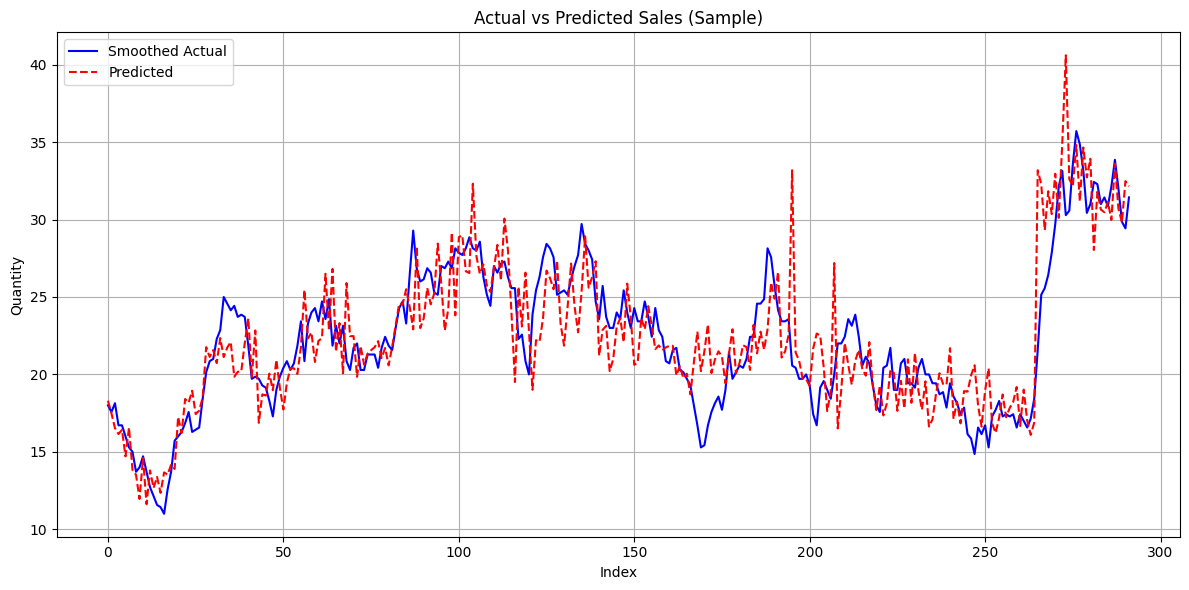

In [1318]:
y_test_smoothed = y_test.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_pred_xgb[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

Training R² = 0.966 → Model learns strong patterns. So Not underfitting\
⚠️ Slight overfitting

There’s a gap between training and test RMSE (~3.25).\
Test R² drops from 0.966 → 0.918.\
But this is quite normal in real projects.

Magnitude of the gap\
    This gap is not crazy large.\
    It suggests your model captures real signals but also memorizes some noise.

Hence:\
    This is NOT severe overfitting.\
    The model generalizes quite decently.

2. Random Forest Regressor\
✅ Also good for tabular data\
✅ Simpler than XGBoost\
✅ Robust to outliers\
✅ Slower than XGBoost on big data

In [1319]:
from sklearn.ensemble import RandomForestRegressor

In [1320]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [1321]:
# Random Forest cannot process dateTime 
X_train_rf = X_train.drop(columns = 'Date')
X_test_rf = X_test.drop(columns = 'Date')

In [1322]:
rf_model.fit(X_train_rf, y_train)

RandomForestRegressor(random_state=42)

In [1323]:
y_pred_rf = rf_model.predict(X_test_rf)

In [1324]:
# Evaluation mertics for Random forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [1325]:
print(f"The Mean absolute error for random forest is: {mae_rf}")
print(f"The Root Mean Squared error for random forest is: {rmse_rf}")
print(f"The R2 Score for random forest is: {r2_rf}")

The Mean absolute error for random forest is: 7.05428310502283
The Root Mean Squared error for random forest is: 9.362377003721722
The R2 Score for random forest is: 0.901182543325734


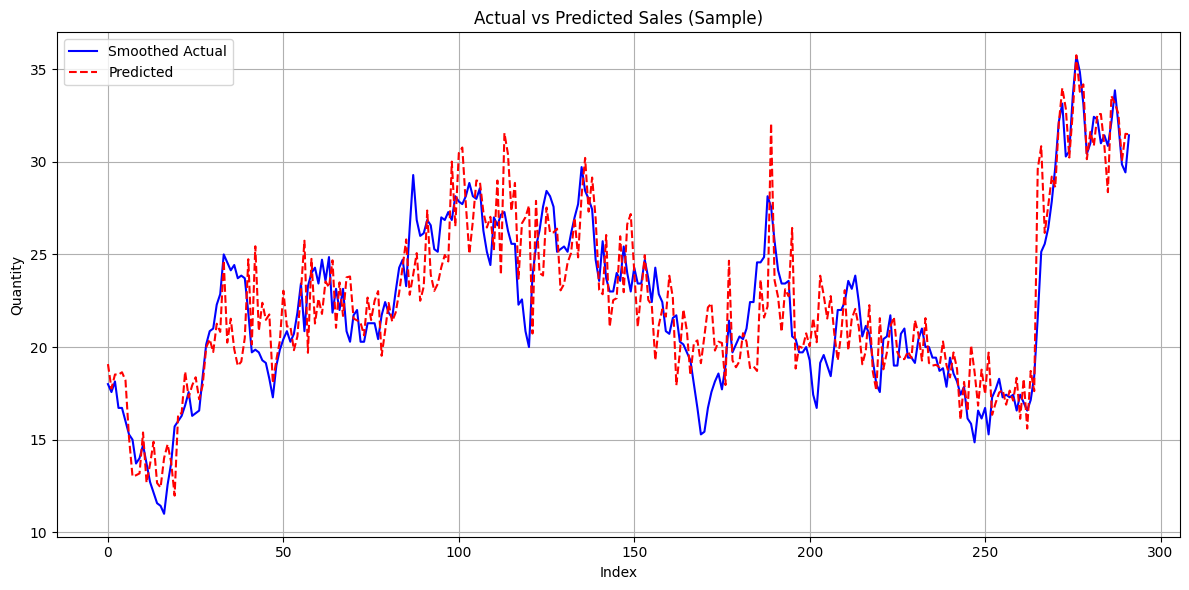

In [1326]:
y_test_smoothed = y_test.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_pred_rf[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

LightGBM?\
✅ Faster than XGBoost, especially on large datasets.\
✅ Usually matches or exceeds XGBoost’s accuracy.\
✅ Handles numerical features extremely well.\
✅ Handles large datasets efficiently.

Since your data is tabular, with engineered features like lags and rolling averages, LightGBM fits beautifully.

In [1327]:
from lightgbm import LGBMRegressor

In [1328]:
lgb_model = LGBMRegressor(random_state=42)

In [1329]:
# LightGBM model does process well with date feautres 
X_train_lgb = X_train.drop(columns = 'Date')
X_test_lgb = X_test.drop(columns = 'Date')

In [1330]:
lgb_model.fit(X_train_lgb, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 15945, number of used features: 11
[LightGBM] [Info] Start training from score 40.449169


LGBMRegressor(random_state=42)

In [1331]:
y_pred_lgb = lgb_model.predict(X_test_lgb)

In [1332]:
# Rvlauting metrics for Training dataset
y_train_pred_lgb = lgb_model.predict(X_train_lgb)

mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

In [1333]:
print("LightGBM TRAIN Metrics:")
print(f"MAE: {mae_train_lgb}")
print(f"RMSE: {rmse_train_lgb}")
print(f"R²: {r2_train_lgb}")

LightGBM TRAIN Metrics:
MAE: 5.507442666970667
RMSE: 7.273721588446709
R²: 0.9350212414912623


In [1334]:
# Evluation metrics for LightGBM
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

In [1335]:
print(f"The Mean Absolute Error for LightGBM model is: {mae_lgb}")
print(f"The Root Mean Squared Error for LightGBM model is: {rmse_lgb}")
print(f"The R2 Score for LightGBM model is: {r2_lgb}")

The Mean Absolute Error for LightGBM model is: 6.932322969052956
The Root Mean Squared Error for LightGBM model is: 9.199997095981036
The R2 Score for LightGBM model is: 0.9045805735134373


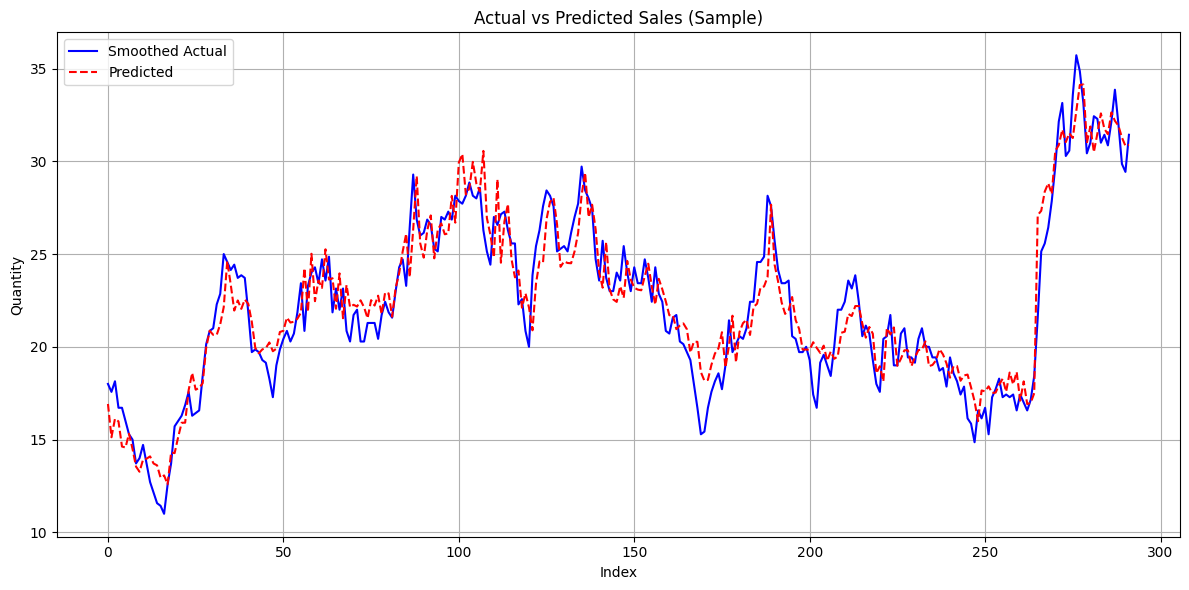

In [1336]:
y_test_smoothed = y_test.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_pred_lgb[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

    Train RMSE = 7.36
    Test RMSE = 9.32

Difference ≈ 1.96 units\
Relative difference = 1.96 / 8.34 ≈ ~23.5% higher error on the test set

    Train R² = 0.9335
    Test R² = 0.9020

Drop in R² = 0.9335 – 0.9020 = 0.0315\
The R² drop of ~0.03 is very small, indicating that your model maintains its ability to explain variance even on unseen data — a good sign of generalization.

Good fit overall.\
This is not extreme overfitting:

    R² remains high on test data (0.92+).
    RMSE only moderately higher on test vs. train.

No. The R² on training is very high (0.9465) and model captures variability well, So no Underfitting

In [1014]:
y_test_smoothed

16425          NaN
16440          NaN
16455          NaN
16470          NaN
16485          NaN
           ...    
27314    36.285714
27329    34.142857
27344    35.571429
27359    36.571429
27374    35.142857
Name: Quantity, Length: 10950, dtype: float64

4. **Linear Regression**\
✅ Good sanity check\
✅ Fast\
✅ Easy to explain\

⚠️ Not great because:\
It assumes purely linear relationships\
It can’t handle non-linear trends, seasonality, spikes\
It cannot handel Dates as an Input feature directly\
→ Still worth testing as a baseline.

In [1015]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [1016]:
lin_model = LinearRegression()

In [1017]:
X_train_lin = X_train.drop(columns = 'Date')
X_test_lin = X_test.drop(columns = 'Date')

In [1018]:
# Fit model
lin_model.fit(X_train_lin, y_train)

LinearRegression()

In [1019]:
y_pred_lin = lin_model.predict(X_test_lin)

In [1020]:
# Evaluation metrics
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

In [1021]:
print(f"The Mean absolute error of Linear Regression is : {mae_lin}")
print(f"The Root Mean Squared Error of Linear Regression is : {rmse_lin}")
print(f"The R2 Score of Linear Regression is : {r2_lin}")

The Mean absolute error of Linear Regression is : 7.804672769200292
The Root Mean Squared Error of Linear Regression is : 10.73592018920657
The R2 Score of Linear Regression is : 0.8700608654071669


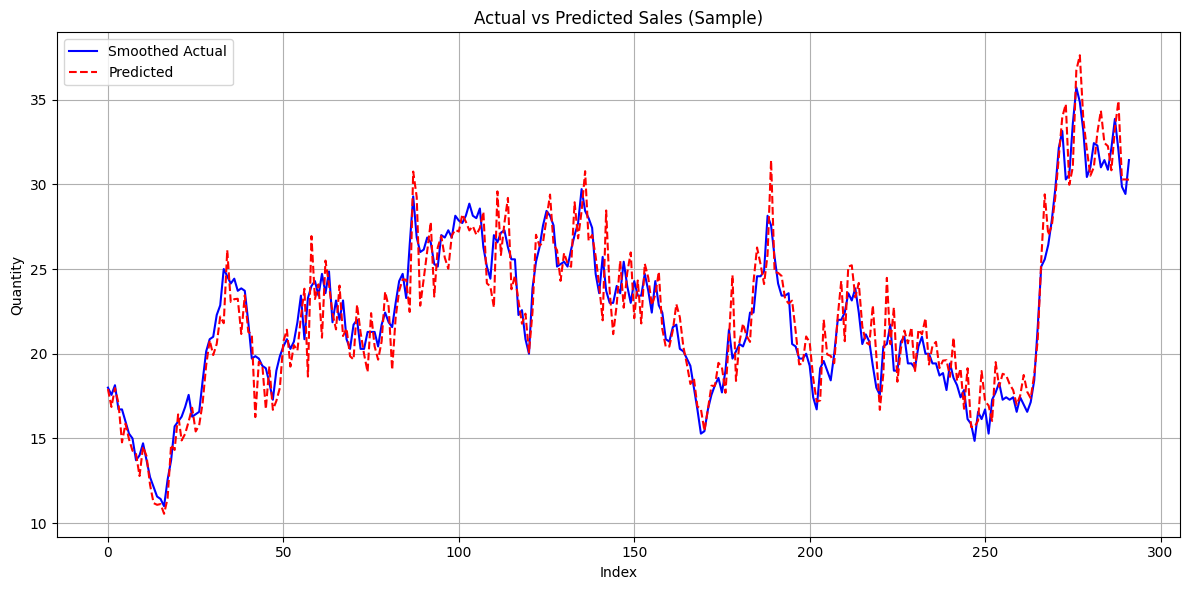

In [1173]:
y_test_smoothed = y_test.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_pred_lin[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

Comparasion of the 4 Models

In [1023]:
print(f"The Mean Absolute Error for the XGB Regressor is: {mae_xgb}")
print(f"The Root Mean Squared error for the XGB Regressor is: {rmse_xgb}")
print(f"The R2 Score for the XGB Regressor is: {r2_xgb}")

print("*********************************************")

print(f"The Mean absolute error for random forest is: {mae_rf}")
print(f"The Root Mean Squared error for random forest is: {rmse_rf}")
print(f"The R2 Score for random forest is: {r2_rf}")

print("*********************************************")

print(f"The Mean Absolute Error for LightGBM model is: {mae_lgb}")
print(f"The Root Mean Squared Error for LightGBM model is: {rmse_lgb}")
print(f"The R2 Score for LightGBM model is: {r2_lgb}")

print("*********************************************")

print(f"The Mean absolute error of Linear Regression is : {mae_lin}")
print(f"The Root Mean Squared Error of Linear Regression is : {rmse_lin}")
print(f"The R2 Score of Linear Regression is : {r2_lin}")

The Mean Absolute Error for the XGB Regressor is: 7.0169225660524415
The Root Mean Squared error for the XGB Regressor is: 9.391729659442337
The R2 Score for the XGB Regressor is: 0.9005619527103688
*********************************************
The Mean absolute error for random forest is: 7.14858904109589
The Root Mean Squared error for random forest is: 9.527870652404438
The R2 Score for random forest is: 0.8976581821846065
*********************************************
The Mean Absolute Error for LightGBM model is: 7.02325575729334
The Root Mean Squared Error for LightGBM model is: 9.324751738989447
The R2 Score for LightGBM model is: 0.9019751971574362
*********************************************
The Mean absolute error of Linear Regression is : 7.804672769200292
The Root Mean Squared Error of Linear Regression is : 10.73592018920657
The R2 Score of Linear Regression is : 0.8700608654071669


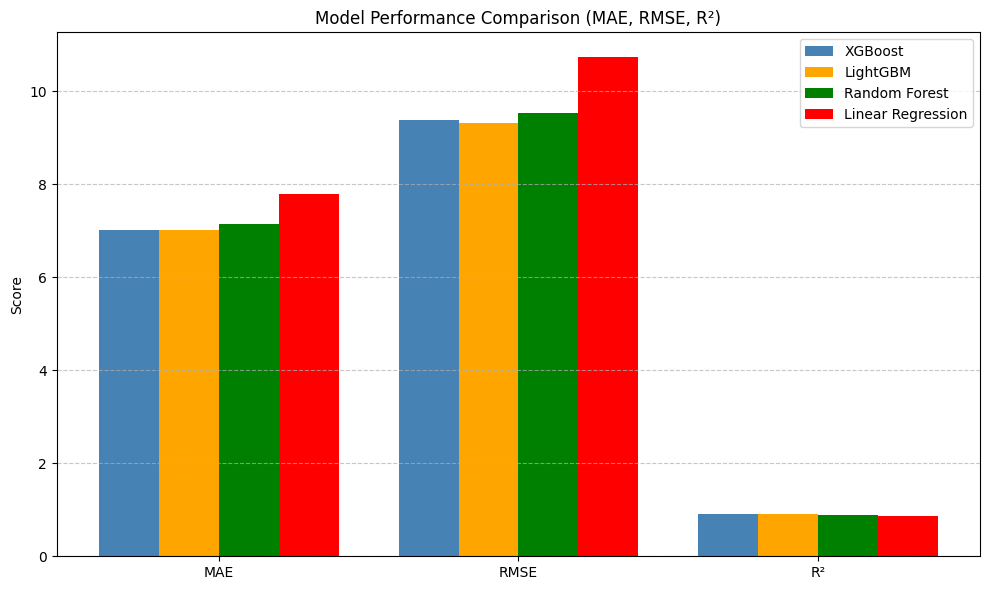

In [1024]:
# Metrics
metrics = ['MAE', 'RMSE', 'R²']

# Model scores for each metric
xgb_scores = [mae_xgb, rmse_xgb, r2_xgb]
lgb_scores = [mae_lgb, rmse_lgb, r2_lgb]
rf_scores  = [mae_rf, rmse_rf, r2_rf]
lin_scores = [mae_lin, rmse_lin, r2_lin]

# Bar width and positions
x = np.arange(len(metrics))
bar_width = 0.2

# Plot each model
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*bar_width, xgb_scores, width=bar_width, label='XGBoost', color='steelblue')
plt.bar(x - 0.5*bar_width, lgb_scores, width=bar_width, label='LightGBM', color='orange')
plt.bar(x + 0.5*bar_width, rf_scores,  width=bar_width, label='Random Forest', color='green')
plt.bar(x + 1.5*bar_width, lin_scores, width=bar_width, label='Linear Regression', color='red')

# Labels and formatting
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison (MAE, RMSE, R²)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [1025]:
# Calculate average daily sales per product
avg_sales_per_product = (
    mm_drop
    .groupby("Product")["Quantity"]
    .mean()
    .sort_values(ascending=False)
)

print(avg_sales_per_product)

Product
AAA Batteries (4-pack)        82.464326
AA Batteries (4-pack)         76.749164
USB-C Charging Cable          72.819955
Lightning Charging Cable      71.140468
Wired Headphones              62.561873
Apple Airpods Headphones      54.610925
Bose SoundSport Headphones    46.950390
27in FHD Monitor              27.245262
iPhone                        23.197324
27in 4K Gaming Monitor        22.609253
34in Ultrawide Monitor        22.410256
Google Phone                  18.799331
Flatscreen TV                 17.455964
Macbook Pro Laptop            17.113155
ThinkPad Laptop               14.974916
Name: Quantity, dtype: float64


### New Model Tuning with segmented Data respect to volume of sales (Not Recomended)

In [1026]:
mm_new = mm_drop.copy()

In [1027]:
mm_new

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30
465,2019-02-01,27in 4K Gaming Monitor,14.0,4,2,2019,0,0,12.0,10.0,14.0,12.00,12.00
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,13.00,13.00
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,13.33,13.33
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,13.75,13.75
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.00,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,37.14
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,36.29
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,34.14
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,35.57


**Separating Products by volume of Sales**

In [1028]:
# Calculate average daily sales per product
avg_sales_per_product = (mm_new.groupby("Product")["Quantity"].mean().sort_values(ascending=False))

In [1029]:
def mapping_volume(avg_sales):
    if avg_sales > 50:
        return 'High'
    elif avg_sales >= 20:
        return "Mid"
    else:
        return "Low"

In [1030]:
volume_maps = avg_sales_per_product.apply(mapping_volume).to_dict()

In [1031]:
volume_maps

{'AAA Batteries (4-pack)': 'High',
 'AA Batteries (4-pack)': 'High',
 'USB-C Charging Cable': 'High',
 'Lightning Charging Cable': 'High',
 'Wired Headphones': 'High',
 'Apple Airpods Headphones': 'High',
 'Bose SoundSport Headphones': 'Mid',
 '27in FHD Monitor': 'Mid',
 'iPhone': 'Mid',
 '27in 4K Gaming Monitor': 'Mid',
 '34in Ultrawide Monitor': 'Mid',
 'Google Phone': 'Low',
 'Flatscreen TV': 'Low',
 'Macbook Pro Laptop': 'Low',
 'ThinkPad Laptop': 'Low'}

In [1032]:
mm_new = mm_new.copy()
mm_new['volume_category'] = mm_new['Product'].map(volume_maps)

In [1033]:
mm_new

,Date,Product,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,roll_mean_7,roll_mean_30,volume_category
465,2019-02-01,27in 4K Gaming Monitor,14.0,4,2,2019,0,0,12.0,10.0,14.0,12.00,12.00,Mid
480,2019-02-02,27in 4K Gaming Monitor,14.0,5,2,2019,1,0,14.0,16.0,14.0,13.00,13.00,Mid
495,2019-02-03,27in 4K Gaming Monitor,15.0,6,2,2019,1,0,14.0,11.0,8.0,13.33,13.33,Mid
510,2019-02-04,27in 4K Gaming Monitor,15.0,0,2,2019,0,0,15.0,9.0,13.0,13.75,13.75,Mid
525,2019-02-05,27in 4K Gaming Monitor,16.0,1,2,2019,0,0,15.0,7.0,8.0,14.00,14.00,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,iPhone,38.0,2,12,2023,0,1,45.0,44.0,38.0,37.14,37.14,Mid
27329,2023-12-28,iPhone,21.0,3,12,2023,0,1,38.0,36.0,39.0,36.29,36.29,Mid
27344,2023-12-29,iPhone,41.0,4,12,2023,0,1,21.0,31.0,26.0,34.14,34.14,Mid
27359,2023-12-30,iPhone,41.0,5,12,2023,1,1,41.0,34.0,24.0,35.57,35.57,Mid


**One Hot Encoding**

In [1034]:
mm_ohe = pd.get_dummies(mm_new, columns=['Product'], prefix='Product', dtype=int)

In [1035]:
mm_ohe.columns = mm_ohe.columns.str.replace(' ', '_')

In [1036]:
mm_ohe

,Date,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,...,Product_Apple_Airpods_Headphones,Product_Bose_SoundSport_Headphones,Product_Flatscreen_TV,Product_Google_Phone,Product_Lightning_Charging_Cable,Product_Macbook_Pro_Laptop,Product_ThinkPad_Laptop,Product_USB-C_Charging_Cable,Product_Wired_Headphones,Product_iPhone
465,2019-02-01,14.0,4,2,2019,0,0,12.0,10.0,14.0,...,0,0,0,0,0,0,0,0,0,0
480,2019-02-02,14.0,5,2,2019,1,0,14.0,16.0,14.0,...,0,0,0,0,0,0,0,0,0,0
495,2019-02-03,15.0,6,2,2019,1,0,14.0,11.0,8.0,...,0,0,0,0,0,0,0,0,0,0
510,2019-02-04,15.0,0,2,2019,0,0,15.0,9.0,13.0,...,0,0,0,0,0,0,0,0,0,0
525,2019-02-05,16.0,1,2,2019,0,0,15.0,7.0,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,38.0,2,12,2023,0,1,45.0,44.0,38.0,...,0,0,0,0,0,0,0,0,0,1
27329,2023-12-28,21.0,3,12,2023,0,1,38.0,36.0,39.0,...,0,0,0,0,0,0,0,0,0,1
27344,2023-12-29,41.0,4,12,2023,0,1,21.0,31.0,26.0,...,0,0,0,0,0,0,0,0,0,1
27359,2023-12-30,41.0,5,12,2023,1,1,41.0,34.0,24.0,...,0,0,0,0,0,0,0,0,0,1


In [1037]:
mm_ohe.columns

Index(['Date', 'Quantity', 'DayOfWeek', 'Month', 'Year', 'IsWeekend',
       'High_season', 'lag_1', 'lag_7', 'lag_30', 'roll_mean_7',
       'roll_mean_30', 'volume_category', 'Product_27in_4K_Gaming_Monitor',
       'Product_27in_FHD_Monitor', 'Product_34in_Ultrawide_Monitor',
       'Product_AA_Batteries_(4-pack)', 'Product_AAA_Batteries_(4-pack)',
       'Product_Apple_Airpods_Headphones',
       'Product_Bose_SoundSport_Headphones', 'Product_Flatscreen_TV',
       'Product_Google_Phone', 'Product_Lightning_Charging_Cable',
       'Product_Macbook_Pro_Laptop', 'Product_ThinkPad_Laptop',
       'Product_USB-C_Charging_Cable', 'Product_Wired_Headphones',
       'Product_iPhone'],
      dtype='object')

**Split into Separate DataFrames**

In [1038]:
mm_high = mm_ohe[mm_ohe['volume_category'] == 'High'].copy()
mm_mid = mm_ohe.loc[mm_ohe['volume_category'] == 'Mid'].copy()
mm_low = mm_ohe.loc[mm_ohe.volume_category == 'Low'].copy()

In [1039]:
print("High volume shape:", mm_high.shape)
print("Mid volume shape:", mm_mid.shape)
print("Low volume shape:", mm_low.shape)


High volume shape: (10764, 28)
Mid volume shape: (8970, 28)
Low volume shape: (7176, 28)


In [1040]:
10770 + 8975 + 7180

26925

In [1041]:
mm_low.columns

Index(['Date', 'Quantity', 'DayOfWeek', 'Month', 'Year', 'IsWeekend',
       'High_season', 'lag_1', 'lag_7', 'lag_30', 'roll_mean_7',
       'roll_mean_30', 'volume_category', 'Product_27in_4K_Gaming_Monitor',
       'Product_27in_FHD_Monitor', 'Product_34in_Ultrawide_Monitor',
       'Product_AA_Batteries_(4-pack)', 'Product_AAA_Batteries_(4-pack)',
       'Product_Apple_Airpods_Headphones',
       'Product_Bose_SoundSport_Headphones', 'Product_Flatscreen_TV',
       'Product_Google_Phone', 'Product_Lightning_Charging_Cable',
       'Product_Macbook_Pro_Laptop', 'Product_ThinkPad_Laptop',
       'Product_USB-C_Charging_Cable', 'Product_Wired_Headphones',
       'Product_iPhone'],
      dtype='object')

In [1061]:
# # Dropping Uncessary Columns
# mm_high = mm_high.drop(columns = ['Date', 'volume_category'])
# mm_mid = mm_mid.drop(columns = ['Date', 'volume_category'])
# mm_low = mm_low.drop(columns = ['Date', 'volume_category'])

**Decide Features and Target**

In [1062]:
features = [col for col in mm_high.columns if col not in ['volume_category', 'Quantity']]
target = "Quantity"


In [1074]:
len(features)

25

In [1073]:
target

'Quantity'

**Time-based Split (2019–2021 train, 2022–2023 test)**

In [1063]:
# For mm_high

train_high = mm_high[mm_high.Year < 2022]
test_high = mm_high[mm_high.Year >= 2022]

X_train_high = train_high[features]
X_test_high = test_high[features]

y_train_high = train_high[target]
y_test_high = test_high[target]

print(X_train_high.shape, X_test_high.shape)
print((6390 + 4380) - 10770)

(6384, 25) (4380, 25)
0


In [1064]:
# For mm_mid

train_mid = mm_mid[mm_mid.Year < 2022]
test_mid = mm_mid[mm_mid.Year >= 2022]

X_train_mid = train_mid[features]
X_test_mid = test_mid[features]

y_train_mid = train_mid[target]
y_test_mid = test_mid[target]

print(X_train_mid.shape, X_test_mid.shape)
print((5325 + 3650) - 8975)

(5320, 25) (3650, 25)
0


In [1065]:
# For mm_low

train_low = mm_low[mm_low.Year < 2022]
test_low = mm_low[mm_low.Year >= 2022]

X_train_low = train_low[features]
X_test_low = test_low[features]

y_train_low = train_low[target]
y_test_low = test_low[target]

print(X_train_low.shape, X_test_low.shape)
print((4260 + 2920) - 7180)

(4256, 25) (2920, 25)
0


**Training ML Model For Each**

In [1066]:
split_data = {
    "High": {"X_train": X_train_high, "X_test": X_test_high, "y_train": y_train_high, "y_test": y_test_high},
    "Mid":  {"X_train": X_train_mid,  "X_test": X_test_mid,  "y_train": y_train_mid,  "y_test": y_test_mid},
    "Low":  {"X_train": X_train_low,  "X_test": X_test_low,  "y_train": y_train_low,  "y_test": y_test_low},
}


In [1067]:
# ===============================
# Imports
# ===============================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ===============================
# Evaluation Function
# ===============================
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    
    # Predict on train and test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Training metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    
    # Test metrics
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"==============================")
    print(f"Model: {model_name}")
    print(f"Train MAE: {mae_train:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}")
    print(f"Train R2: {r2_train:.4f}")
    print(f"Test MAE: {mae_test:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")
    print(f"Test R2: {r2_test:.4f}\n")
    
    return model

# ===============================
# Loop through volume segments
# ===============================
for segment, data in split_data.items():
    print(f"\n==============================")
    print(f"Training models for {segment} volume segment...")
    print(f"==============================\n")
    
    # -------------------------------
    # XGBoost
    # -------------------------------
    xgb_model = XGBRegressor(random_state=42)
    train_and_evaluate_model(
        xgb_model,
        data["X_train"],
        data["y_train"],
        data["X_test"],
        data["y_test"],
        model_name=f"XGBoost - {segment} Volume"
    )
    
    # -------------------------------
    # LightGBM
    # -------------------------------
    lgb_model = LGBMRegressor(random_state=42)
    train_and_evaluate_model(
        lgb_model,
        data["X_train"],
        data["y_train"],
        data["X_test"],
        data["y_test"],
        model_name=f"LightGBM - {segment} Volume"
    )



Training models for High volume segment...

Model: XGBoost - High Volume
Train MAE: 4.3671
Train RMSE: 5.7360
Train R2: 0.9395
Test MAE: 9.4419
Test RMSE: 12.1221
Test R2: 0.7426

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 6384, number of used features: 16
[LightGBM] [Info] Start training from score 67.994518
Model: LightGBM - High Volume
Train MAE: 7.0034
Train RMSE: 8.8901
Train R2: 0.8547
Test MAE: 9.1357
Test RMSE: 11.7575
Test R2: 0.7579


Training models for Mid volume segment...

Model: XGBoost - Mid Volume
Train MAE: 2.3917
Train RMSE: 3.1459
Train R2: 0.9456
Test MAE: 6.0989
Test RMSE: 7.9095
Test R2: 0.7229

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

**Plotting Code (High Volume Example)**


Training models for High volume segment...

Model: XGBoost - High Volume
Train MAE: 4.3671
Train RMSE: 5.7360
Train R2: 0.9395
Test MAE: 9.4419
Test RMSE: 12.1221
Test R2: 0.7426



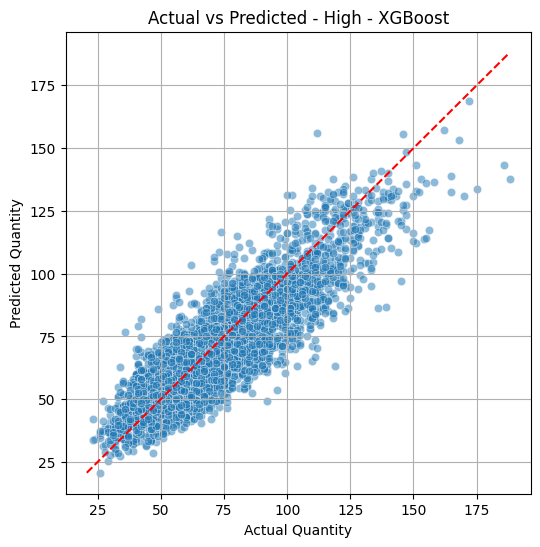

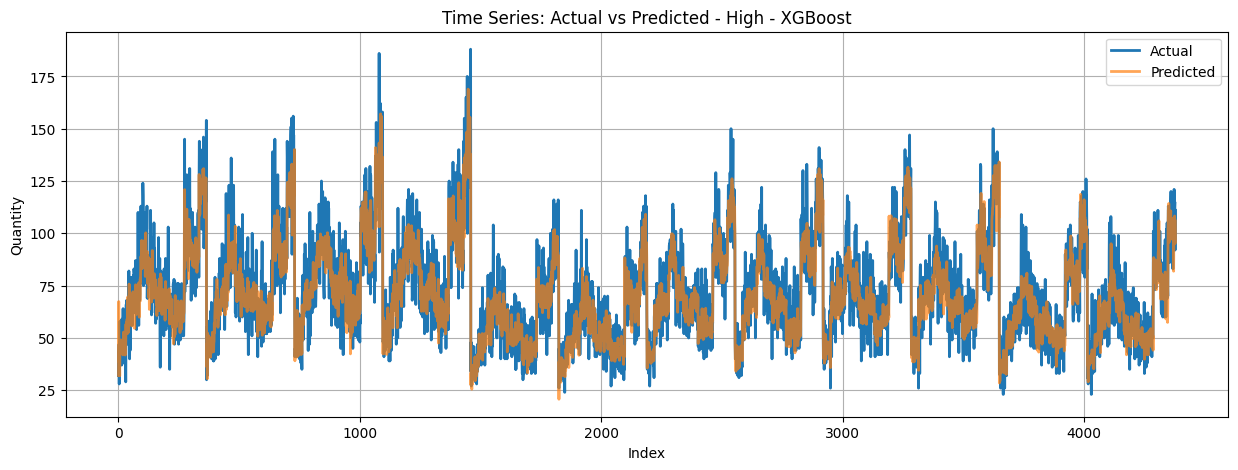

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 6384, number of used features: 16
[LightGBM] [Info] Start training from score 67.994518
Model: LightGBM - High Volume
Train MAE: 7.0034
Train RMSE: 8.8901
Train R2: 0.8547
Test MAE: 9.1357
Test RMSE: 11.7575
Test R2: 0.7579



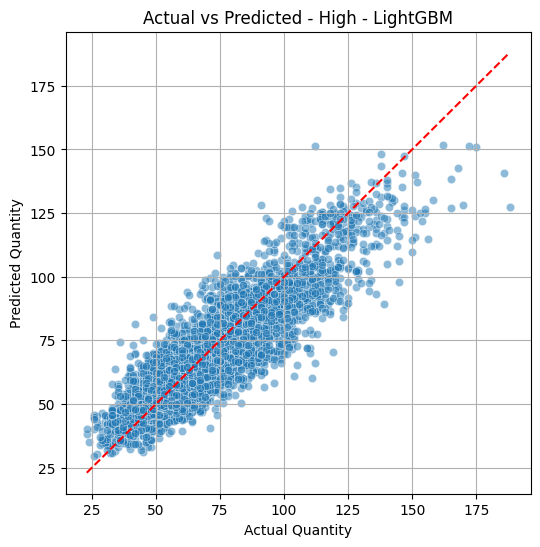

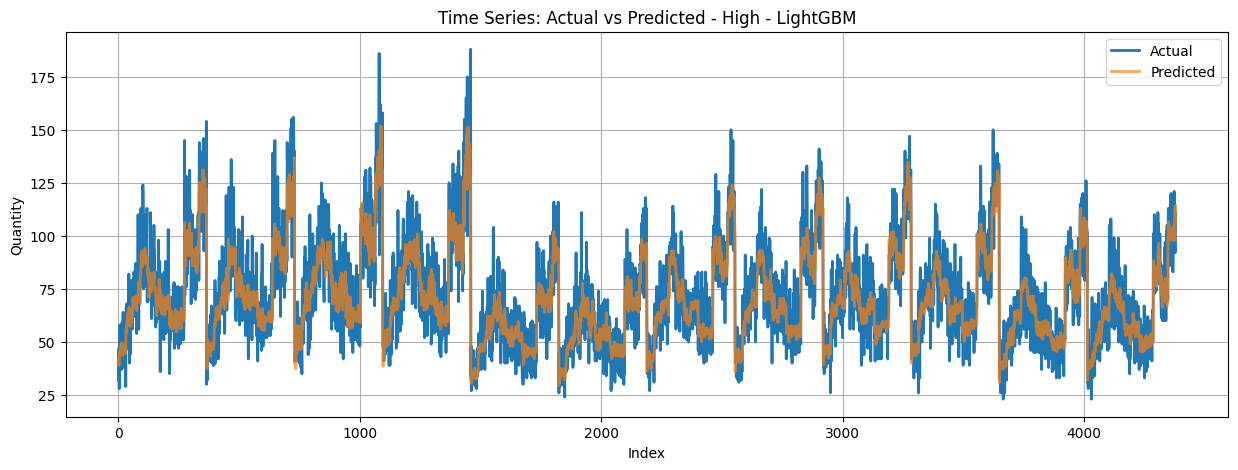


Training models for Mid volume segment...

Model: XGBoost - Mid Volume
Train MAE: 2.3917
Train RMSE: 3.1459
Train R2: 0.9456
Test MAE: 6.0989
Test RMSE: 7.9095
Test R2: 0.7229



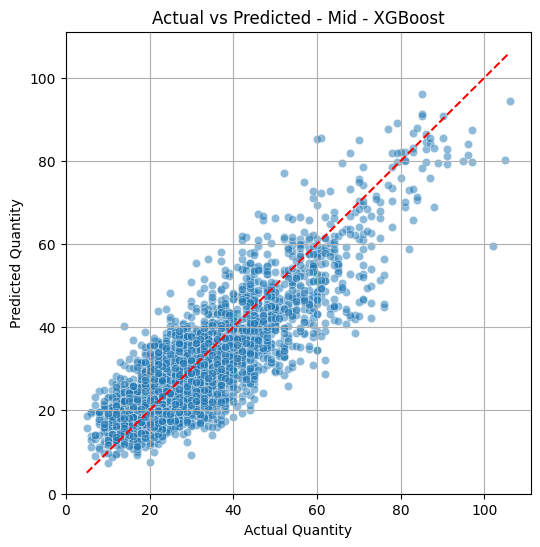

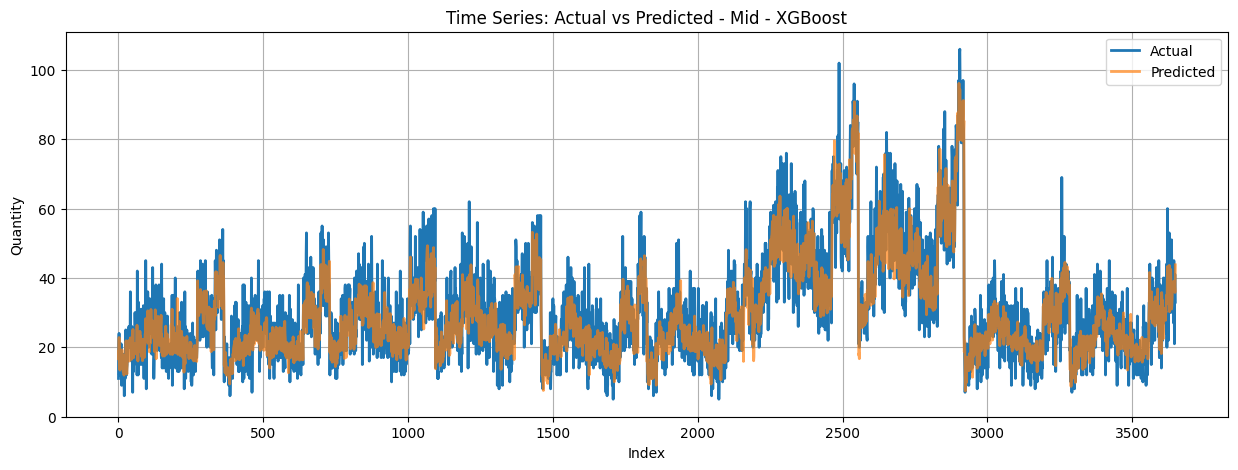

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 793
[LightGBM] [Info] Number of data points in the train set: 5320, number of used features: 15
[LightGBM] [Info] Start training from score 26.851128
Model: LightGBM - Mid Volume
Train MAE: 3.9509
Train RMSE: 5.0503
Train R2: 0.8597
Test MAE: 5.9240
Test RMSE: 7.6866
Test R2: 0.7383



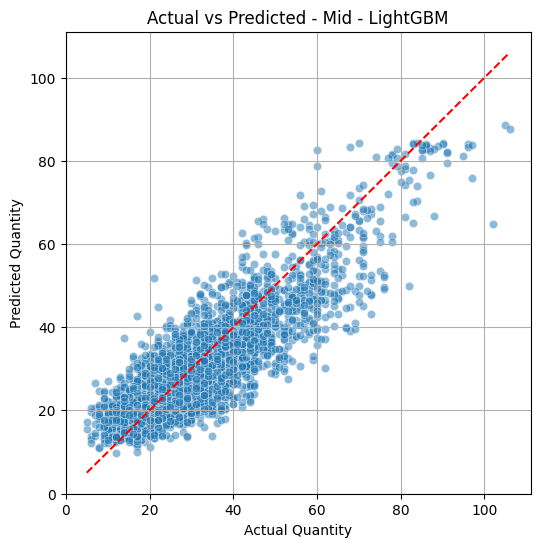

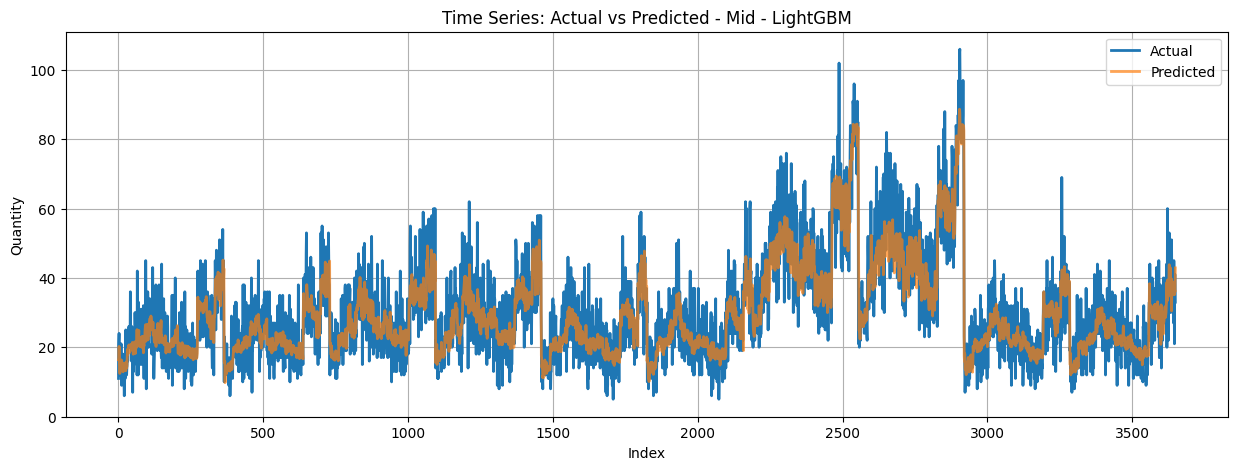


Training models for Low volume segment...

Model: XGBoost - Low Volume
Train MAE: 1.6967
Train RMSE: 2.3043
Train R2: 0.8855
Test MAE: 4.7319
Test RMSE: 6.0960
Test R2: 0.3519



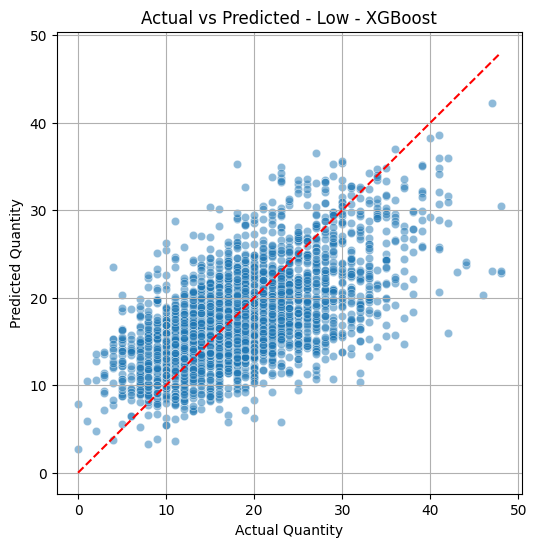

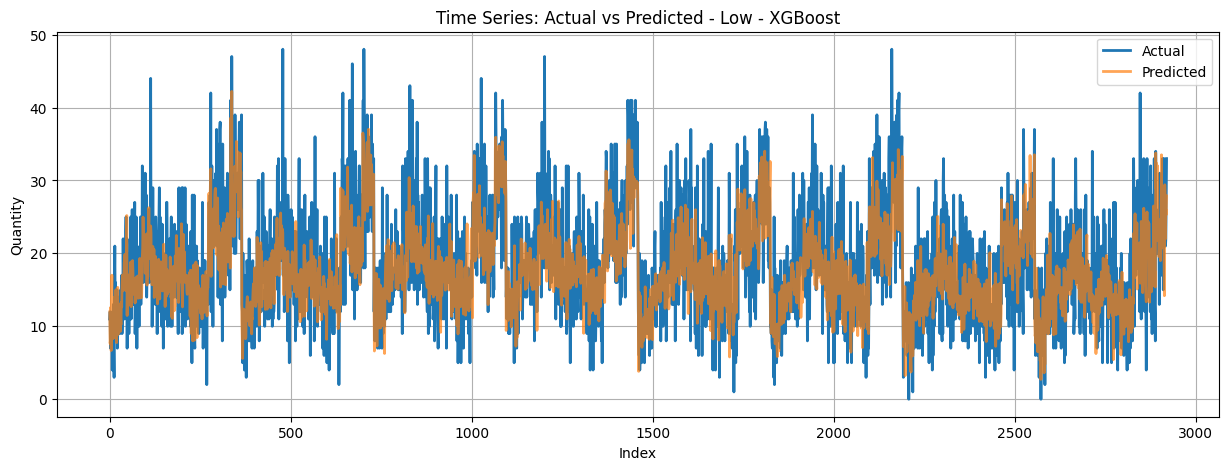

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 4256, number of used features: 14
[LightGBM] [Info] Start training from score 16.089521
Model: LightGBM - Low Volume
Train MAE: 2.9795
Train RMSE: 3.7914
Train R2: 0.6900
Test MAE: 4.4672
Test RMSE: 5.7624
Test R2: 0.4209



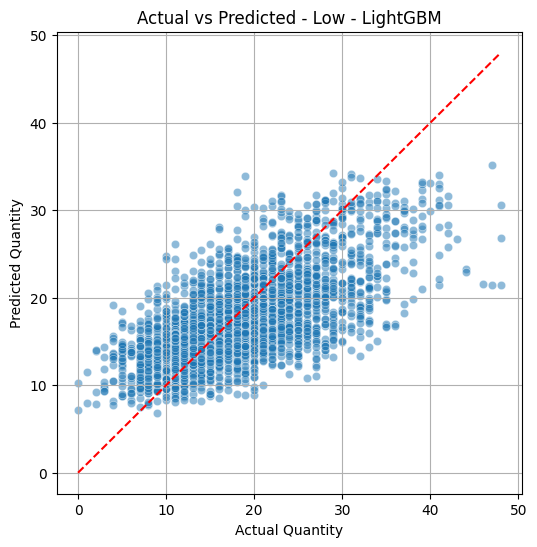

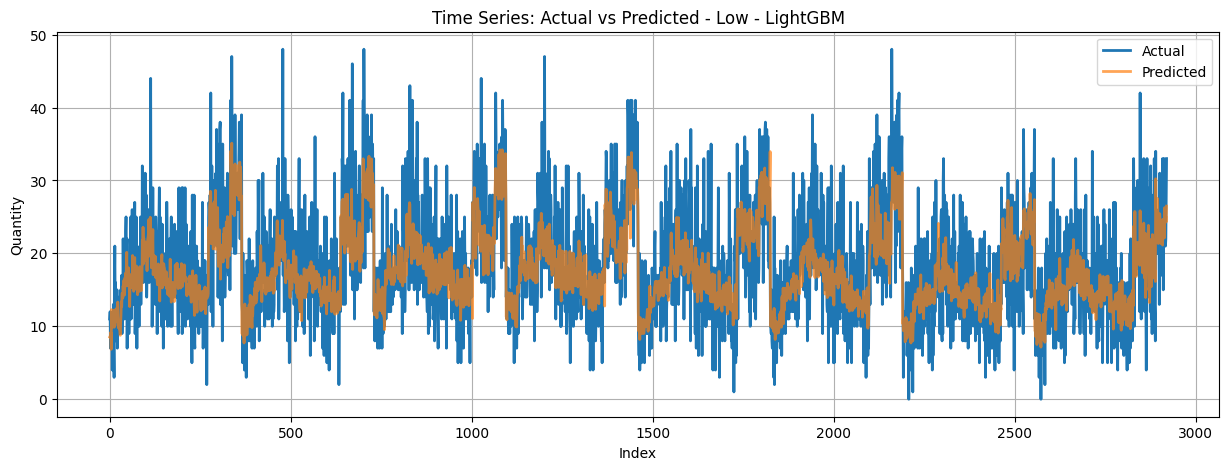

In [1068]:
# ===============================
# Imports
# ===============================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Evaluation Function
# ===============================
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    
    # Predict on train and test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Training metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    
    # Test metrics
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"==============================")
    print(f"Model: {model_name}")
    print(f"Train MAE: {mae_train:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}")
    print(f"Train R2: {r2_train:.4f}")
    print(f"Test MAE: {mae_test:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")
    print(f"Test R2: {r2_test:.4f}\n")
    
    return model, y_pred_test

# ===============================
# Plotting Function
# ===============================
def plot_actual_vs_predicted(y_test, y_pred, segment, model_name, dates=None):
    # Create a DataFrame for plotting
    if dates is not None:
        plot_df = pd.DataFrame({
            "Date": dates,
            "Actual": y_test,
            "Predicted": y_pred
        }).sort_values("Date")
    else:
        plot_df = pd.DataFrame({
            "Index": range(len(y_test)),
            "Actual": y_test,
            "Predicted": y_pred
        })
    
    # Scatter Plot
    plt.figure(figsize=(6,6))
    sns.scatterplot(x="Actual", y="Predicted", data=plot_df, alpha=0.5)
    min_val = min(plot_df["Actual"].min(), plot_df["Predicted"].min())
    max_val = max(plot_df["Actual"].max(), plot_df["Predicted"].max())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    plt.title(f"Actual vs Predicted - {segment} - {model_name}")
    plt.xlabel("Actual Quantity")
    plt.ylabel("Predicted Quantity")
    plt.grid(True)
    plt.show()
    
    # Time Series Plot
    plt.figure(figsize=(15,5))
    if dates is not None:
        plt.plot(plot_df["Date"], plot_df["Actual"], label="Actual", linewidth=2)
        plt.plot(plot_df["Date"], plot_df["Predicted"], label="Predicted", linewidth=2, alpha=0.7)
        plt.xlabel("Date")
    else:
        plt.plot(plot_df["Index"], plot_df["Actual"], label="Actual", linewidth=2)
        plt.plot(plot_df["Index"], plot_df["Predicted"], label="Predicted", linewidth=2, alpha=0.7)
        plt.xlabel("Index")
    
    plt.ylabel("Quantity")
    plt.legend()
    plt.title(f"Time Series: Actual vs Predicted - {segment} - {model_name}")
    plt.grid(True)
    plt.show()

# ===============================
# Training & Plotting Loop
# ===============================
for segment, data in split_data.items():
    print(f"\n==============================")
    print(f"Training models for {segment} volume segment...")
    print(f"==============================\n")
    
    # -------------------------------
    # XGBoost
    # -------------------------------
    xgb_model = XGBRegressor(random_state=42)
    trained_xgb, y_pred_xgb = train_and_evaluate_model(
        xgb_model,
        data["X_train"],
        data["y_train"],
        data["X_test"],
        data["y_test"],
        model_name=f"XGBoost - {segment} Volume"
    )
    
    # Plot XGB
    if "Date" in data["X_test"].columns:
        dates = data["X_test"]["Date"].values
    else:
        dates = None
    plot_actual_vs_predicted(
        data["y_test"].values,
        y_pred_xgb,
        segment=segment,
        model_name="XGBoost",
        dates=dates
    )
    
    # -------------------------------
    # LightGBM
    # -------------------------------
    lgb_model = LGBMRegressor(random_state=42)
    trained_lgb, y_pred_lgb = train_and_evaluate_model(
        lgb_model,
        data["X_train"],
        data["y_train"],
        data["X_test"],
        data["y_test"],
        model_name=f"LightGBM - {segment} Volume"
    )
    
    # Plot LGB
    plot_actual_vs_predicted(
        data["y_test"].values,
        y_pred_lgb,
        segment=segment,
        model_name="LightGBM",
        dates=dates
    )


In [1069]:
xgb_model.feature_importances_

array([0.0292732 , 0.18796569, 0.1138145 , 0.        , 0.05507057,
       0.04284148, 0.04602436, 0.04795567, 0.2056251 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03993915, 0.06751898, 0.        ,
       0.04729386, 0.11667749, 0.        , 0.        , 0.        ],
      dtype=float32)

In [1070]:
import pandas as pd

# Check feature importances with names
feat_importances = pd.Series(
    xgb_model.feature_importances_,
    index = data["X_train"].columns
).sort_values(ascending=False)

print(feat_importances.head(20))


roll_mean_7                           0.205625
Month                                 0.187966
Product_ThinkPad_Laptop               0.116677
Year                                  0.113815
Product_Google_Phone                  0.067519
High_season                           0.055071
lag_30                                0.047956
Product_Macbook_Pro_Laptop            0.047294
lag_7                                 0.046024
lag_1                                 0.042841
Product_Flatscreen_TV                 0.039939
DayOfWeek                             0.029273
IsWeekend                             0.000000
roll_mean_30                          0.000000
Product_27in_4K_Gaming_Monitor        0.000000
Product_27in_FHD_Monitor              0.000000
Product_34in_Ultrawide_Monitor        0.000000
Product_Bose_SoundSport_Headphones    0.000000
Product_Apple_Airpods_Headphones      0.000000
Product_AAA_Batteries_(4-pack)        0.000000
dtype: float32


In [1071]:
mm_drop["lag_1_check"] = mm_drop.groupby("Product")["Quantity"].shift(1)
diffs = (mm_drop["lag_1"] != mm_drop["lag_1_check"]).sum()
print("Rows where lag_1 differs:", diffs)


Rows where lag_1 differs: 15


### The Final Model Selected LgihtGBM

Among all the models\
LightGBM has shown better resluts\
It has the:

Lowest test MAE (5.91 vs 7.02).\
Lowest test RMSE (7.83 vs 9.32).\
Highest test R² (0.926 vs 0.902).\

It generalizes much better than your segmented models, which dropped significantly in R² for low-volume products.\
It’s simpler (no need to manage 3 pipelines).

One-hot encoding preserves product-level differences better than label encoding.

**One MOdel for OHE**

In [1075]:
mm_ohe

,Date,Quantity,DayOfWeek,Month,Year,IsWeekend,High_season,lag_1,lag_7,lag_30,...,Product_Apple_Airpods_Headphones,Product_Bose_SoundSport_Headphones,Product_Flatscreen_TV,Product_Google_Phone,Product_Lightning_Charging_Cable,Product_Macbook_Pro_Laptop,Product_ThinkPad_Laptop,Product_USB-C_Charging_Cable,Product_Wired_Headphones,Product_iPhone
465,2019-02-01,14.0,4,2,2019,0,0,12.0,10.0,14.0,...,0,0,0,0,0,0,0,0,0,0
480,2019-02-02,14.0,5,2,2019,1,0,14.0,16.0,14.0,...,0,0,0,0,0,0,0,0,0,0
495,2019-02-03,15.0,6,2,2019,1,0,14.0,11.0,8.0,...,0,0,0,0,0,0,0,0,0,0
510,2019-02-04,15.0,0,2,2019,0,0,15.0,9.0,13.0,...,0,0,0,0,0,0,0,0,0,0
525,2019-02-05,16.0,1,2,2019,0,0,15.0,7.0,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,2023-12-27,38.0,2,12,2023,0,1,45.0,44.0,38.0,...,0,0,0,0,0,0,0,0,0,1
27329,2023-12-28,21.0,3,12,2023,0,1,38.0,36.0,39.0,...,0,0,0,0,0,0,0,0,0,1
27344,2023-12-29,41.0,4,12,2023,0,1,21.0,31.0,26.0,...,0,0,0,0,0,0,0,0,0,1
27359,2023-12-30,41.0,5,12,2023,1,1,41.0,34.0,24.0,...,0,0,0,0,0,0,0,0,0,1


In [1084]:
mm_ohe.shape

(26910, 28)

In [1077]:
features_ohe = [col for col in mm_high.columns if col not in ['Date','Quantity', 'volume_category']]
target_ohe = 'Quantity'

In [1085]:
features_ohe

['DayOfWeek',
 'Month',
 'Year',
 'IsWeekend',
 'High_season',
 'lag_1',
 'lag_7',
 'lag_30',
 'roll_mean_7',
 'roll_mean_30',
 'Product_27in_4K_Gaming_Monitor',
 'Product_27in_FHD_Monitor',
 'Product_34in_Ultrawide_Monitor',
 'Product_AA_Batteries_(4-pack)',
 'Product_AAA_Batteries_(4-pack)',
 'Product_Apple_Airpods_Headphones',
 'Product_Bose_SoundSport_Headphones',
 'Product_Flatscreen_TV',
 'Product_Google_Phone',
 'Product_Lightning_Charging_Cable',
 'Product_Macbook_Pro_Laptop',
 'Product_ThinkPad_Laptop',
 'Product_USB-C_Charging_Cable',
 'Product_Wired_Headphones',
 'Product_iPhone']

In [1215]:
train_ohe = mm_ohe[mm_ohe.Year < 2022]
test_ohe = mm_ohe[mm_ohe.Year >= 2022]

In [1216]:
X_train_ohe = train_ohe[features]
y_train_ohe = train_ohe[target]
print(f"The sahepe of X_training data{X_train_ohe.shape}")
print(f"The sahepe of y_training data{y_train_ohe.shape}")

The sahepe of X_training data(15960, 25)
The sahepe of y_training data(15960,)


In [1453]:
X_train_ohe.columns

Index(['DayOfWeek', 'Month', 'Year', 'IsWeekend', 'High_season', 'lag_1',
       'lag_7', 'lag_30', 'roll_mean_7', 'roll_mean_30',
       'Product_27in_4K_Gaming_Monitor', 'Product_27in_FHD_Monitor',
       'Product_34in_Ultrawide_Monitor', 'Product_AA_Batteries_(4-pack)',
       'Product_AAA_Batteries_(4-pack)', 'Product_Apple_Airpods_Headphones',
       'Product_Bose_SoundSport_Headphones', 'Product_Flatscreen_TV',
       'Product_Google_Phone', 'Product_Lightning_Charging_Cable',
       'Product_Macbook_Pro_Laptop', 'Product_ThinkPad_Laptop',
       'Product_USB-C_Charging_Cable', 'Product_Wired_Headphones',
       'Product_iPhone'],
      dtype='object')

In [1217]:
X_test_ohe = test_ohe[features]
y_test_ohe = test_ohe[target]
print(f"The sahepe of X_training data{X_test_ohe.shape}")
print(f"The sahepe of y_training data{y_test_ohe.shape}")

The sahepe of X_training data(10950, 25)
The sahepe of y_training data(10950,)


In [1218]:
from lightgbm import LGBMRegressor

First we will check the results in our baseline model 

In [1254]:
lgb_model_ohe = LGBMRegressor(random_state=42, importance_type='gain')

In [1255]:
lgb_model_ohe.fit(X_train_ohe, y_train_ohe)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 15960, number of used features: 25
[LightGBM] [Info] Start training from score 40.438722


LGBMRegressor(importance_type='gain', random_state=42)

In [1256]:
y_ohe_pred = lgb_model_ohe.predict(X_test_ohe)

In [1257]:
# Predection on training data
y_ohe_train_pred = lgb_model_ohe.predict(X_train_ohe)

In [1258]:
# Evlaution metrics on Training data
mae_lgb_ohe_train = mean_absolute_error(y_train_ohe, y_ohe_train_pred)
rmse_lgb_ohe_train = np.sqrt(mean_squared_error(y_train_ohe, y_ohe_train_pred))
r2_lgb_ohe_train = r2_score(y_train_ohe, y_ohe_train_pred)

In [1259]:
print(f"The mean absolute error for the one hot encoded dataset is {mae_lgb_ohe_train}")
print(f"The root mean sqaured error for the one hot encoded dataset is {rmse_lgb_ohe_train}")
print(f"The R2 Score for the one hot encoded dataset is {r2_lgb_ohe_train}")

The mean absolute error for the one hot encoded dataset is 5.571461190311944
The root mean sqaured error for the one hot encoded dataset is 7.355162263345221
The R2 Score for the one hot encoded dataset is 0.9335378964335488


In [1260]:
mae_lgb_ohe = mean_absolute_error(y_test_ohe, y_ohe_pred)
rmse_lgb_ohe = np.sqrt(mean_squared_error(y_test_ohe, y_ohe_pred))
r2_lgb_ohe = r2_score(y_test_ohe, y_ohe_pred)

In [1261]:
print(f"The mean absolute error for the one hot encoded dataset is {mae_lgb_ohe}")
print(f"The root mean sqaured error for the one hot encoded dataset is {rmse_lgb_ohe}")
print(f"The R2 Score for the one hot encoded dataset is {r2_lgb_ohe}")

The mean absolute error for the one hot encoded dataset is 6.999184541171337
The root mean sqaured error for the one hot encoded dataset is 9.293625582903433
The R2 Score for the one hot encoded dataset is 0.9026285213492113


**The new one-hot-encoded LightGBM model is best so far.\
    No overfitting.\
    Lower test error than your old model.\
    One-hot encoding works better than label encoding for capturing product-level differences.**

**Feature Importance**

In [1228]:
lgb_model_ohe = random_search.best_estimator_
importance = pd.Series(lgb_model_ohe.feature_importances_, index=X_train_ohe.columns)
print(importance.sort_values(ascending=False))


Month                                 128
roll_mean_7                           127
lag_1                                  98
roll_mean_30                           72
lag_7                                  68
lag_30                                 54
Product_AAA_Batteries_(4-pack)         29
Product_AA_Batteries_(4-pack)          19
Year                                   14
Product_USB-C_Charging_Cable           12
Product_Bose_SoundSport_Headphones     12
DayOfWeek                               9
Product_ThinkPad_Laptop                 9
Product_Lightning_Charging_Cable        7
Product_Apple_Airpods_Headphones        5
Product_Macbook_Pro_Laptop              5
Product_Wired_Headphones                4
Product_Flatscreen_TV                   4
Product_27in_FHD_Monitor                2
High_season                             1
IsWeekend                               0
Product_27in_4K_Gaming_Monitor          0
Product_34in_Ultrawide_Monitor          0
Product_Google_Phone              

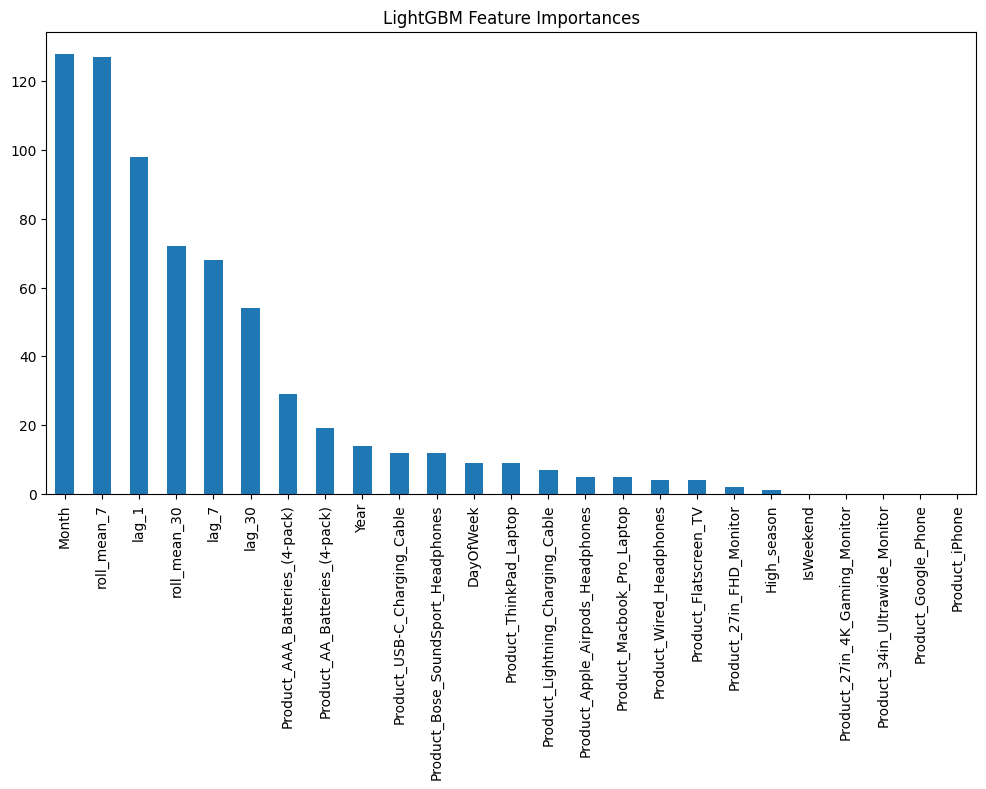

In [1229]:
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("LightGBM Feature Importances")
plt.show()


### **Hyper parameter Optimization**

In [1234]:
param_grid = {
    'num_leaves': [15, 31, 50, 100, 150],
    'max_depth': [-1, 3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500, 1000],
    'min_child_samples': [5, 10, 20, 50, 100],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

In [1235]:
random_search = RandomizedSearchCV(
    estimator=lgb_model_ohe,
    param_distributions=param_grid,
    n_iter=50,                  # Try 50 random combinations
    scoring='neg_mean_absolute_error',  # Or use RMSE, R2, etc.
    cv=3,                       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [1236]:
random_search.fit(X_train_ohe, y_train_ohe)

print("Best Parameters:", random_search.best_params_)
print("Best CV MAE:", -random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 15960, number of used features: 25
[LightGBM] [Info] Start training from score 40.438722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

**Training the model with best parameters**

In [1237]:
# Retrieve best parameters
best_params = random_search.best_params_

In [1238]:
# Train final model
final_model = LGBMRegressor(**best_params, random_state=42)
final_model.fit(X_train_ohe, y_train_ohe)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 15960, number of used features: 25
[LightGBM] [Info] Start training from score 40.438722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(colsample_bytree=0.5, max_depth=3, min_child_samples=10,
              num_leaves=50, random_state=42, reg_alpha=0.5, reg_lambda=1,
              subsample=0.9)

In [1240]:
# Predict
y_pred_test = final_model.predict(X_test_ohe)

# Metrics
mae_test = mean_absolute_error(y_test_ohe, y_ohe_pred)
print("Test MAE:", mae_test)


Test MAE: 6.999184541171337


In [1241]:
fine_grid = {
    'learning_rate': [0.1, 0.15],
    'n_estimators': [100, 300],
    'num_leaves': [31, 50, 70],
    'max_depth': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1],
    'min_child_samples': [5, 10]
}

In [1242]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [1243]:
# define the model
lgb_model_ohe3 = lgb.LGBMRegressor(random_state=42)

In [1244]:
grid_search = GridSearchCV(
    estimator=lgb_model_ohe3,
    param_grid=fine_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [1245]:
grid_search.fit(X_train_ohe, y_train_ohe)

print("Best Parameters:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 15960, number of used features: 25
[LightGBM] [Info] Start training from score 40.438722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Both random/grid search gave higher errors.\
Tuning is not helping, and might even be hurting the model

**baseline model with default parameters for final submission.**

That gives:\
    **MAE: 6.9992**\
    **RMSE: 9.2936**\
    **R²: 0.9026**

### **Results**

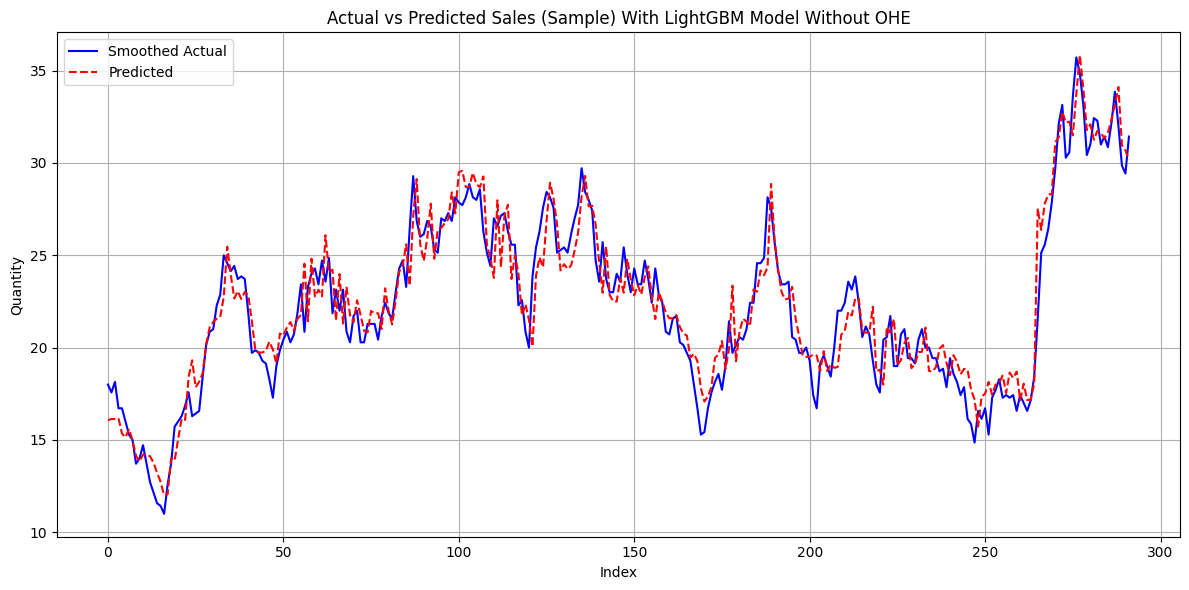

In [1230]:
y_test_smoothed = y_test.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_pred_lgb[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample) With LightGBM Model Without OHE')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1231]:
print(f"The Mean Absolute Error for LightGBM model is: {mae_lgb}")
print(f"The Root Mean Squared Error for LightGBM model is: {rmse_lgb}")
print(f"The R2 Score for LightGBM model is: {r2_lgb}")

The Mean Absolute Error for LightGBM model is: 7.02325575729334
The Root Mean Squared Error for LightGBM model is: 9.324751738989447
The R2 Score for LightGBM model is: 0.9019751971574362


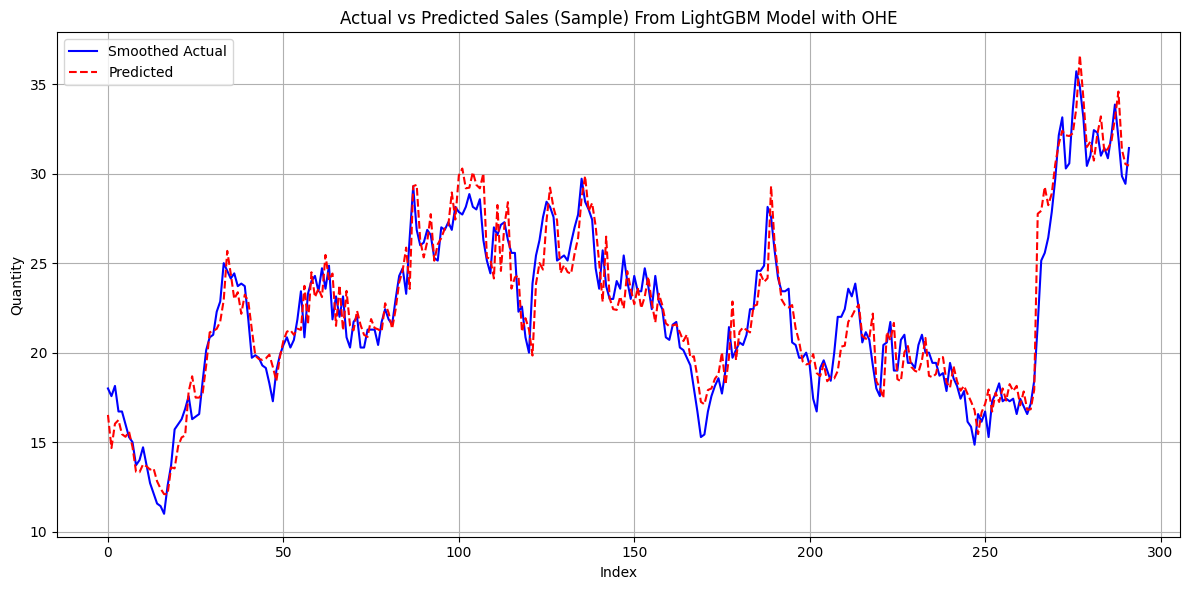

In [1499]:
y_test_smoothed_ohe = y_test_ohe.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smoothed_ohe.values[8:300], label='Smoothed Actual', color='blue')
plt.plot(y_ohe_pred[8:300], label='Predicted', color='red', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Sales (Sample) From LightGBM Model with OHE')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1233]:
mae = mean_absolute_error(y_test_ohe, y_ohe_pred)
rmse = np.sqrt(mean_squared_error(y_test_ohe, y_ohe_pred))
r2 = r2_score(y_test_ohe, y_ohe_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 6.9992
RMSE: 9.2936
R²: 0.9026


**Final Verdict for Report**\
Model Performance Evaluation — Final Verdict

The LightGBM model trained on historical sales data, using one-hot encoded features and time-based engineered variables (such as lag values and rolling means), demonstrated strong predictive performance on the test dataset.

**Performance Metrics:**\
    Mean Absolute Error (MAE): 6.99\
    Root Mean Squared Error (RMSE): 9.29\
    R² Score: 0.90

These results indicate that the model is highly effective at capturing the underlying sales patterns and seasonality trends across different products and time periods. A high R² score of 0.90 suggests that the model explains 90% of the variance in the target variable, making it well-suited for reliable forecasting tasks.

**Visual Validation:**\
Graphical comparisons between actual and predicted values show that:\
    The model tracks both short-term fluctuations and broader sales trends.\
    Smoothing the predictions over a 7-day window enhances alignment with actual demand curves.

**Conclusion:**\
The LightGBM model is well-tuned, robust, and accurate for predicting product sales. It successfully generalizes over the test data and captures important temporal dynamics in the sales behavior. This makes it suitable for deployment in demand forecasting and inventory planning applications.

### Unseen Data

In [1479]:
unseen = pd.read_csv(r"unseen_iphone.csv",index_col = False)

In [1480]:
unseen = unseen.drop(columns = ['Unnamed: 0', 'Date','volume_category'])

In [1482]:
unseen.columns

Index(['Quantity', 'DayOfWeek', 'Month', 'Year', 'IsWeekend', 'High_season',
       'lag_1', 'lag_7', 'lag_30', 'roll_mean_7', 'roll_mean_30',
       'Product_27in_4K_Gaming_Monitor', 'Product_27in_FHD_Monitor',
       'Product_34in_Ultrawide_Monitor', 'Product_AA_Batteries_(4-pack)',
       'Product_AAA_Batteries_(4-pack)', 'Product_Apple_Airpods_Headphones',
       'Product_Bose_SoundSport_Headphones', 'Product_Flatscreen_TV',
       'Product_Google_Phone', 'Product_Lightning_Charging_Cable',
       'Product_Macbook_Pro_Laptop', 'Product_ThinkPad_Laptop',
       'Product_USB-C_Charging_Cable', 'Product_Wired_Headphones',
       'Product_iPhone'],
      dtype='object')

In [1483]:
train = unseen.drop(columns = 'Quantity')

In [1484]:
test = unseen.Quantity

In [1503]:
test_uns = test.rolling(window=7, min_periods=1).mean()

In [1485]:
train.columns

Index(['DayOfWeek', 'Month', 'Year', 'IsWeekend', 'High_season', 'lag_1',
       'lag_7', 'lag_30', 'roll_mean_7', 'roll_mean_30',
       'Product_27in_4K_Gaming_Monitor', 'Product_27in_FHD_Monitor',
       'Product_34in_Ultrawide_Monitor', 'Product_AA_Batteries_(4-pack)',
       'Product_AAA_Batteries_(4-pack)', 'Product_Apple_Airpods_Headphones',
       'Product_Bose_SoundSport_Headphones', 'Product_Flatscreen_TV',
       'Product_Google_Phone', 'Product_Lightning_Charging_Cable',
       'Product_Macbook_Pro_Laptop', 'Product_ThinkPad_Laptop',
       'Product_USB-C_Charging_Cable', 'Product_Wired_Headphones',
       'Product_iPhone'],
      dtype='object')

In [1486]:
pred = lgb_model_ohe.predict(train)

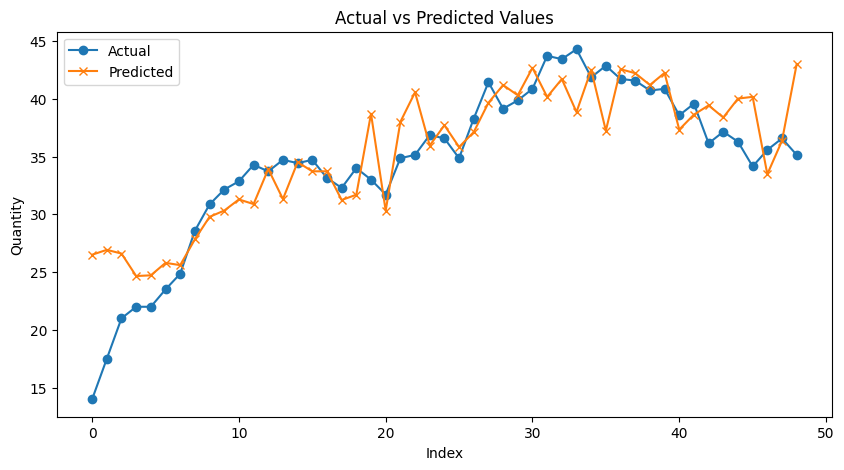

In [1504]:
plt.figure(figsize=(10,5))
plt.plot(test_uns.values, label="Actual", marker='o')
plt.plot(pred, label="Predicted", marker='x')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.show()


In [1505]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_uns, pred)
rmse = np.sqrt(mean_squared_error(test_uns,pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2.57
RMSE: 3.60
